<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

#Imports Standard Scaler to transform numerical features to a common scale
from sklearn.preprocessing import StandardScaler

#Imports the tensorflow,keras and layers.
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import backend
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.models import Sequential

#Import SMOTE to create synthetic samples
from imblearn.over_sampling import SMOTE

#Import warnings to suppress unnecessary warnings
# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the dataset.
data = pd.read_csv('/content/drive/My Drive/Bank Churn Project/bank-1.csv')
#Copy of the data set
df = data.copy()

## Data Overview

###Displaying the first few rows of the dataset

In [4]:
# Let's view the first 5 rows of the data
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

###Displaying the last few rows of the dataset

In [5]:
# Let's view the last 5 rows of the data
data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

### Checking the shape of the dataset

In [6]:
# Checking the number of rows and columns in the data
data.shape

(10000, 14)



*   The dataset has 10000 rows and 14 columns




###Checking the data types of the columns of the dataset

In [7]:
# Let's check the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB




*   There are 10000  observations and 14 columns in the data.
*   11 columns are numerical and 3 columns are of the object datatype
*   There are no missing values




###Checking for duplicate values

In [8]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0



*   There are no duplicates




### Checking for missing values

In [9]:
# Let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64



*   There are no missing values


###Statistical Summary

In [10]:
data.describe(include='all').T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0



*   Credit Score of customers range from 350 to 850 ,75% of them have 718 score
*   Age of customers range from 18 to 92 ,50% of them above 37yrs
*   Customers have been with the bank for 0 to 10 years, with 50% of them less than 5yrs
*   Balance of customers range from 0 to around 250K
*   Customers uses 1-4 bank products.75% of them uses 2 products.
*   Estimated Salary ranges from 11.58 to around 200K




### Checking the unique values

In [11]:
# Let's check the number of unique values in each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64



*   Each value of the column 'CustomerId' is a unique identifier for a customer. Hence we can drop this column as it will not add any predictive power or value to the model.
*  RowNumber column can also be dropped that is a unique identifier
*  Surname does not add any value to the model and we will drop this column
*  The 'Geography' column has 3 unique categories.
*  The 'Tenure' column has 11 unique values where customers have been with the bank for 0-10 years.





In [12]:
#Display the unique values of each categorical columns
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


*   There are 2932 unique surnames. This column will be dropped as it will not add value to the model
*   The 3 geography values are France,Germany and Spain. 50% of the customers are from France and the remaining 50% are from Germany and Spain.
*   There are more male customers than females.



### Target variable "Exited" Value counts

In [13]:
#value counts of target variable "Exited"
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
#Proportion of target data distribution
data['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64



*   Around 80% of data in class 0 (Customer did not leave the bank in the last 6 months)
*   20% of data in class 1 (Customer left the bank in the last 6 months)



## Exploratory Data Analysis

#### Below functions are used for EDA

In [15]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Feature Engineering

#### Removing Features

*    CustomerId and RowNumber with unique values that does not add value to the model
*  Surname also does not add any value to the model. We will remove.




In [19]:
# Removing features Customer Id , RowNumber and Surname
data.drop(["CustomerId", "RowNumber","Surname"], axis=1, inplace=True)


### Univariate Analysis

#### Numerical Column Analysis

Numerical Features:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


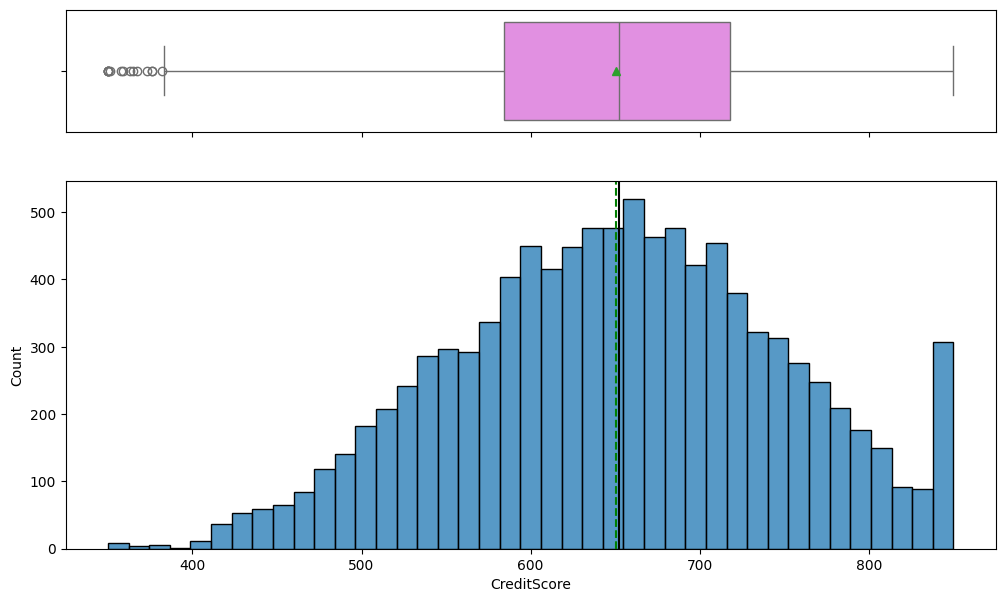

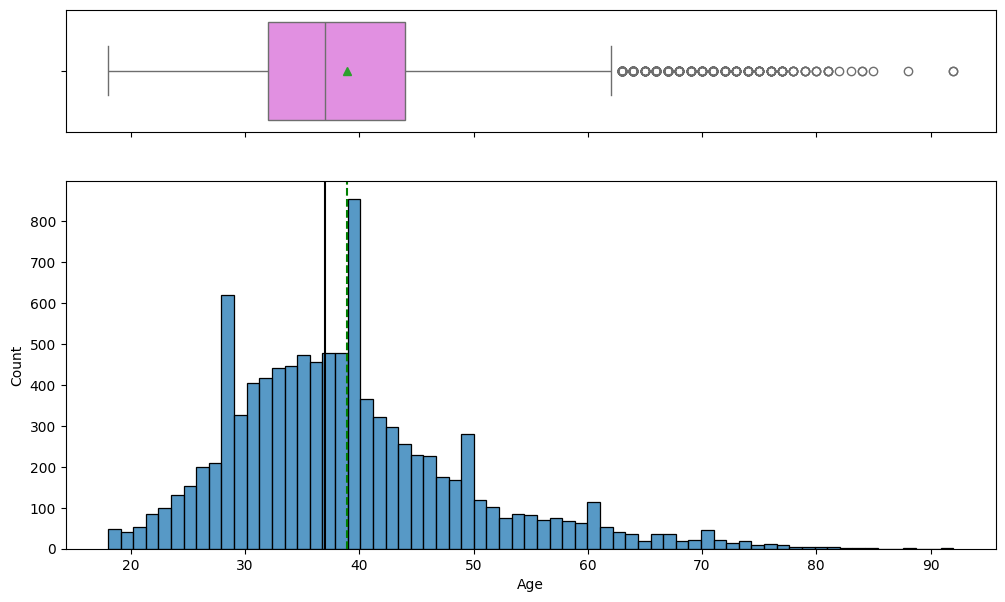

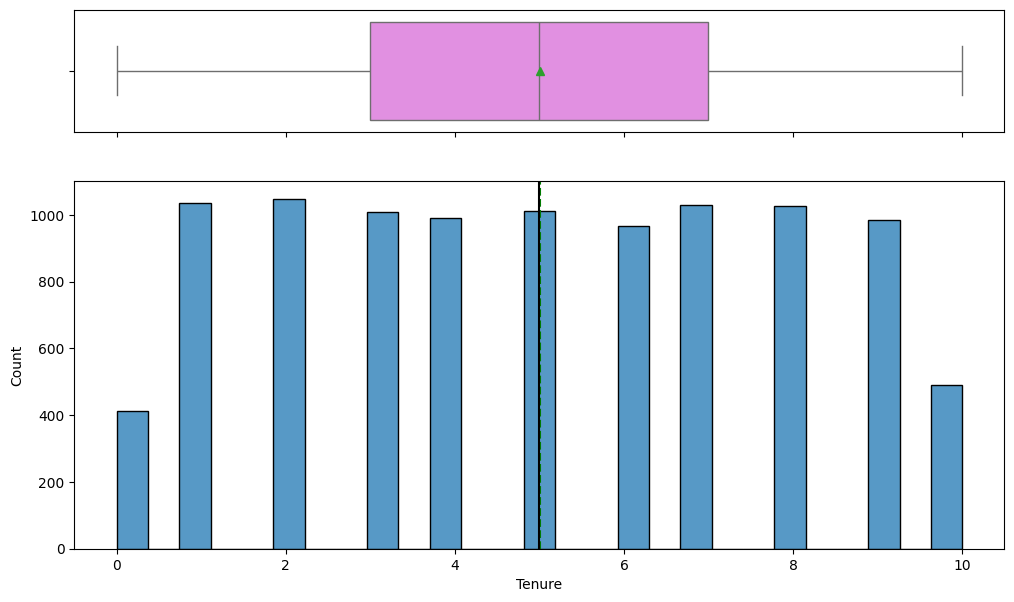

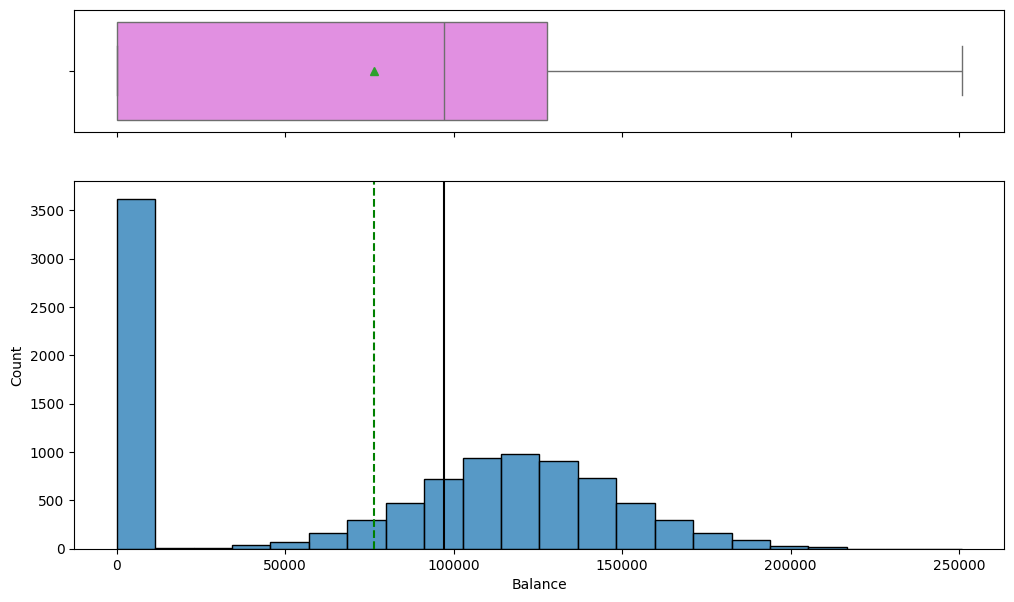

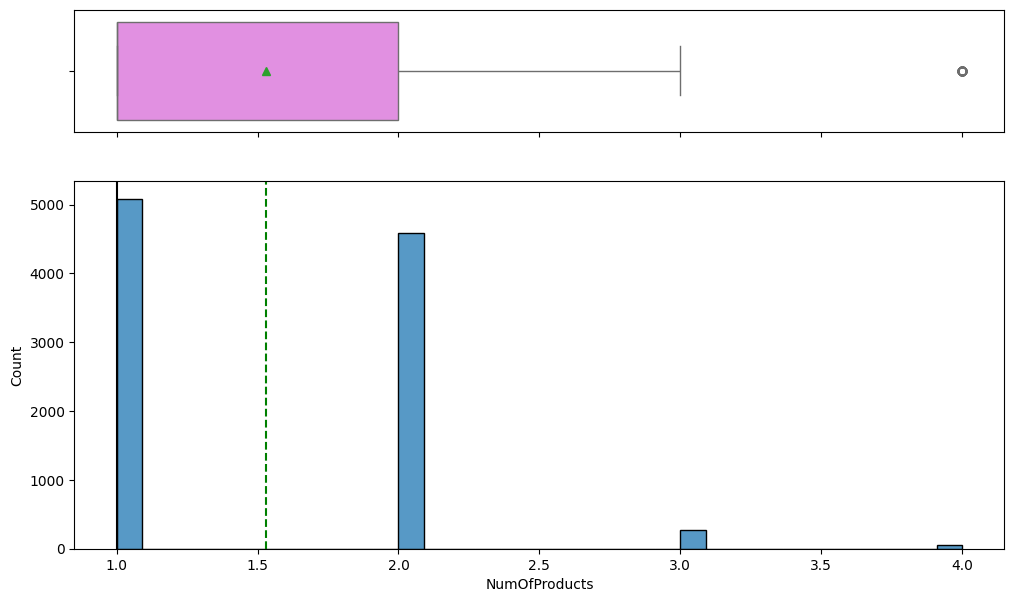

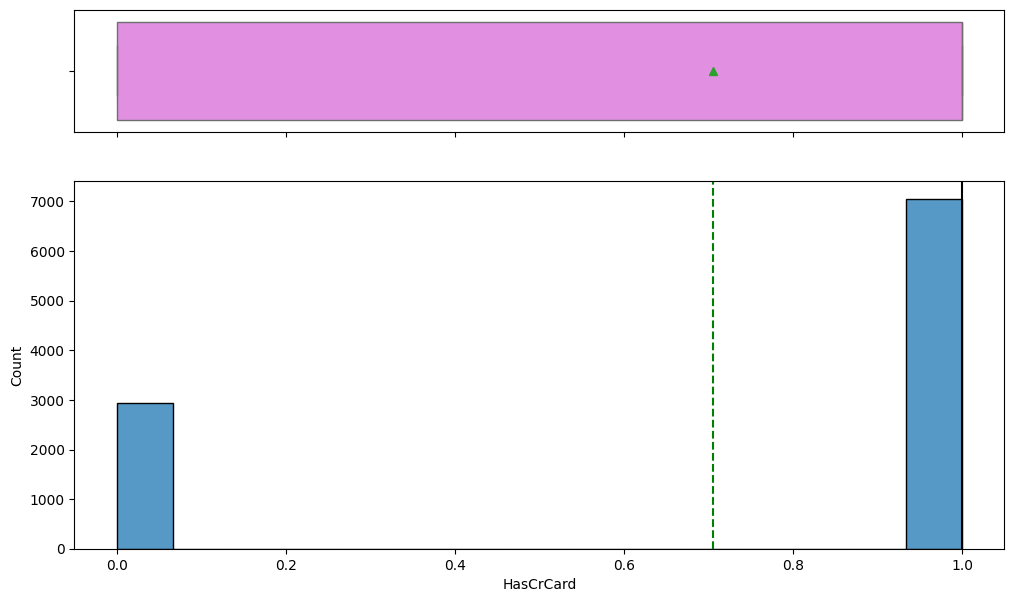

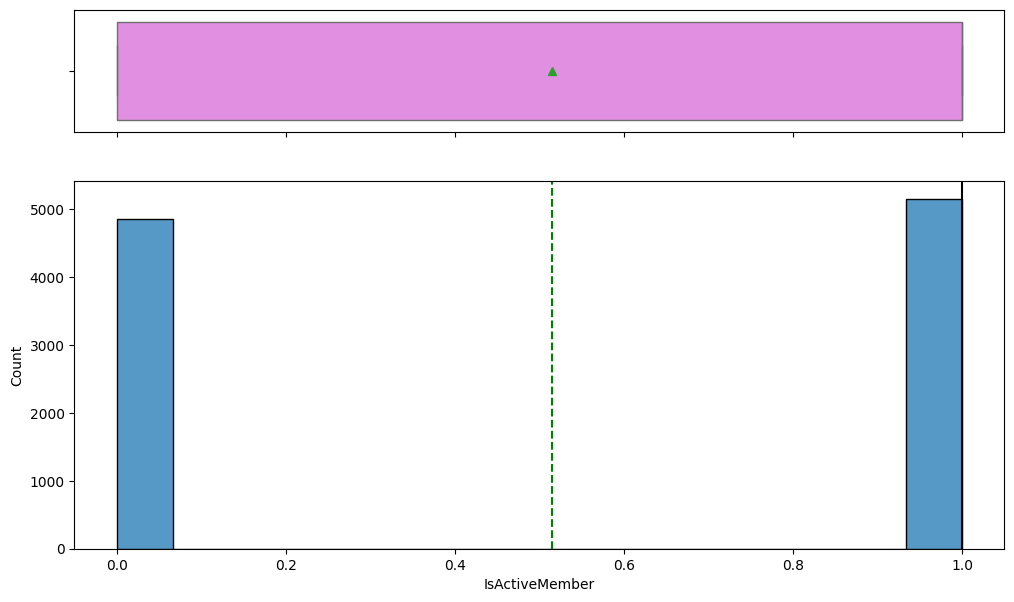

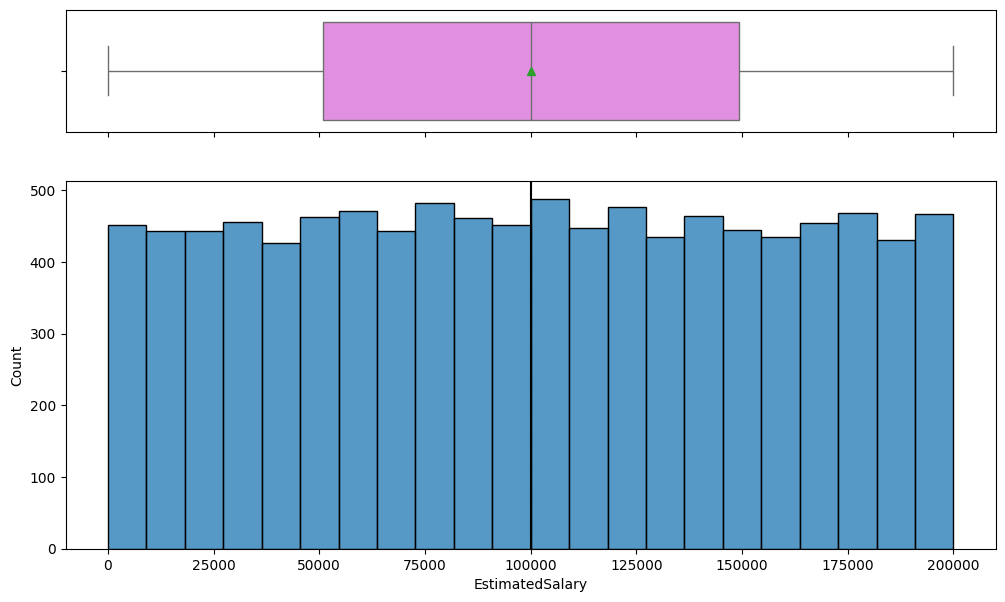

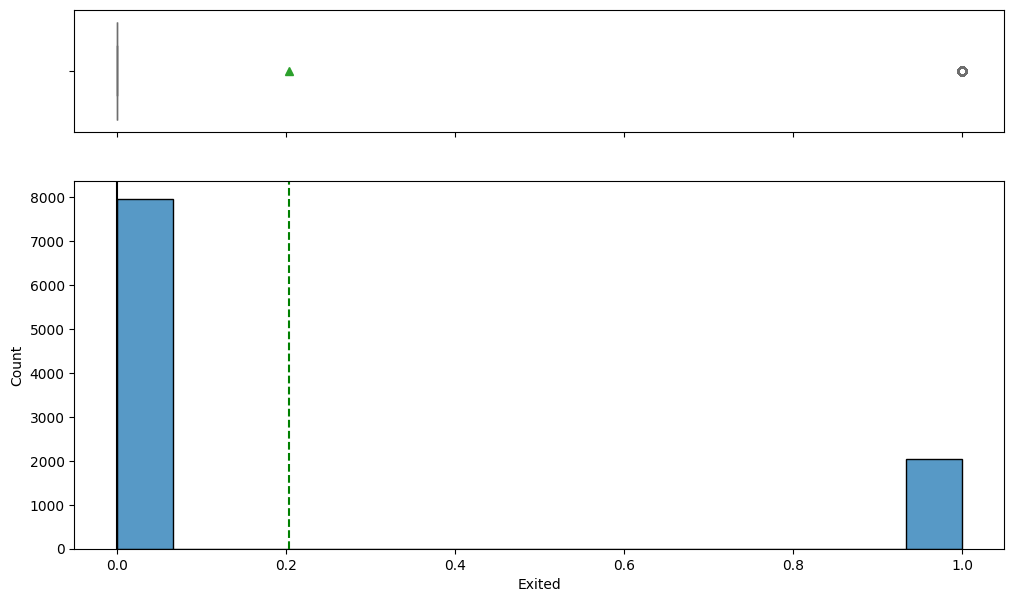

In [20]:
# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

print("Numerical Features:")
print(features)
# creating the histograms for the numerical features selected above
for i, feature in enumerate(features):
  histogram_boxplot(data, feature)

Numerical Features:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


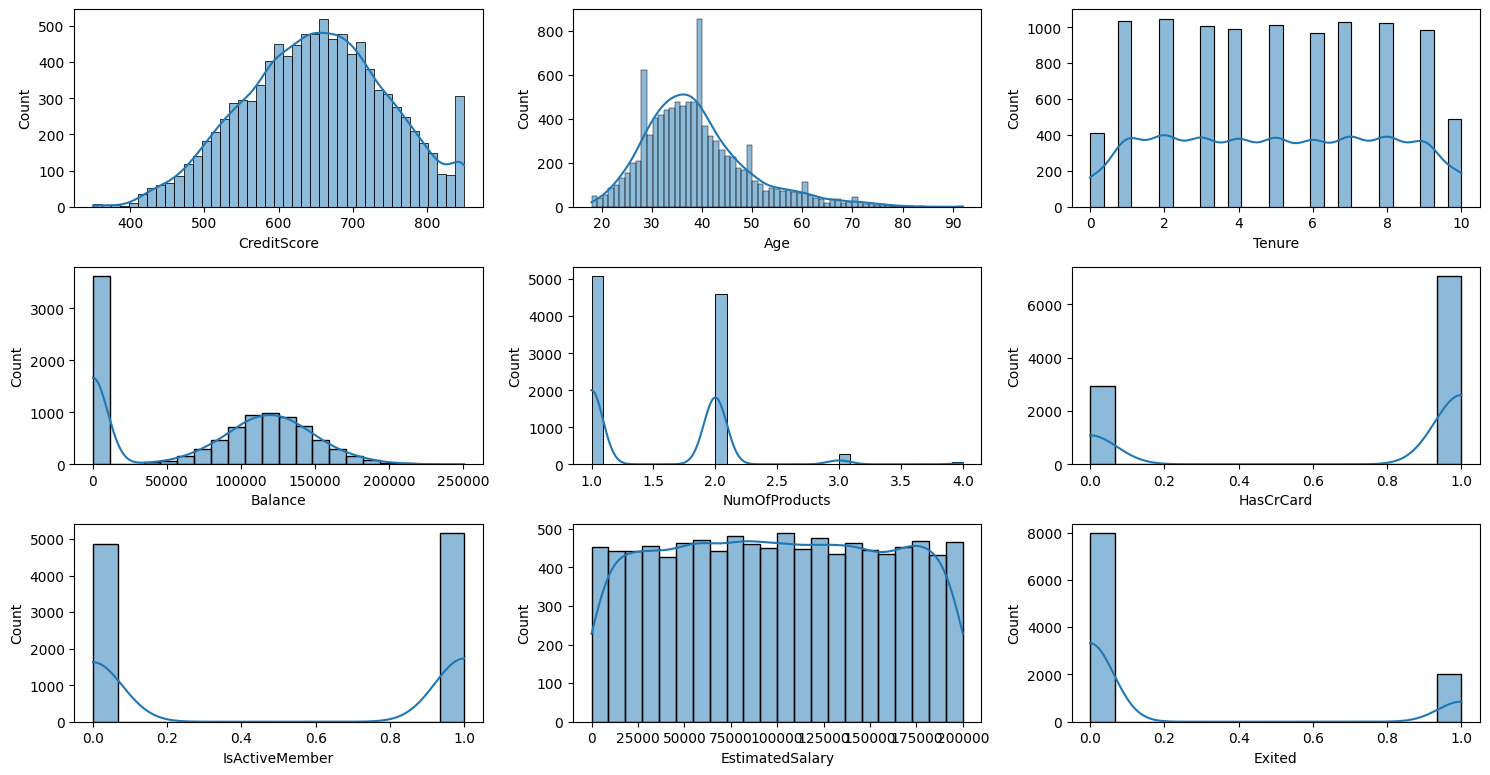

In [21]:
# defining the figure size
plt.figure(figsize=(15, 10))

print("Numerical Features:")
print(features)
# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature,kde='True')    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()



*   Credit score is left skewed distribution
*   Age is right skewed distribution
*   Balance is left skewed.
*   EstimatedSalary is close to symmetrical distribution
*   There are outliers in credit score and Age . But we will not treat them as they seem to be valid.


#### Categorical Columns Analysis

#####Gender

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


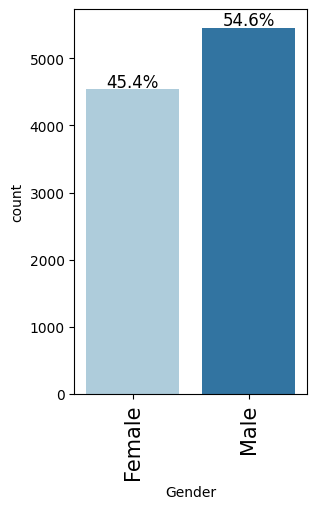

In [23]:
labeled_barplot(data, "Gender",perc=True)



*   There are more male customers than female
*    54.6% are males and remaining are females



##### Geography

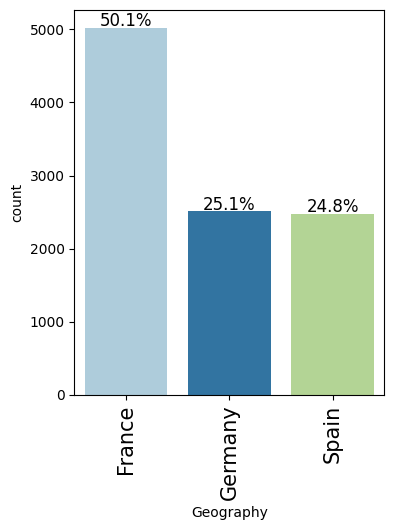

In [24]:
labeled_barplot(data, "Geography",perc=True)



*   There are more customers from France than Germany and Spain.
*   50.1% customers are from France, 25.1% from Germany and 24.8% from Spain




##### HasCreditCard

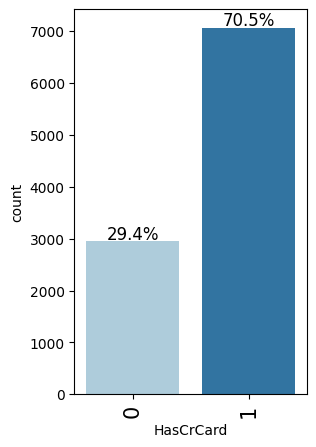

In [25]:
labeled_barplot(data, "HasCrCard",perc=True)



*   70.5% of customers has credit card.
*   29.4% of customers does not have credit card




##### IsActiveMember

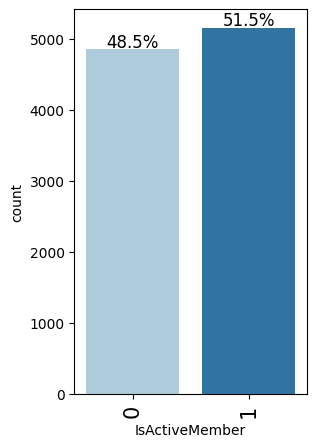

In [26]:
labeled_barplot(data, "IsActiveMember",perc=True)



*   70.5% of customers has credit card.
*   29.4% of customers does not have credit card




### Bivariate Analysis

#####CreditScore vs Exited

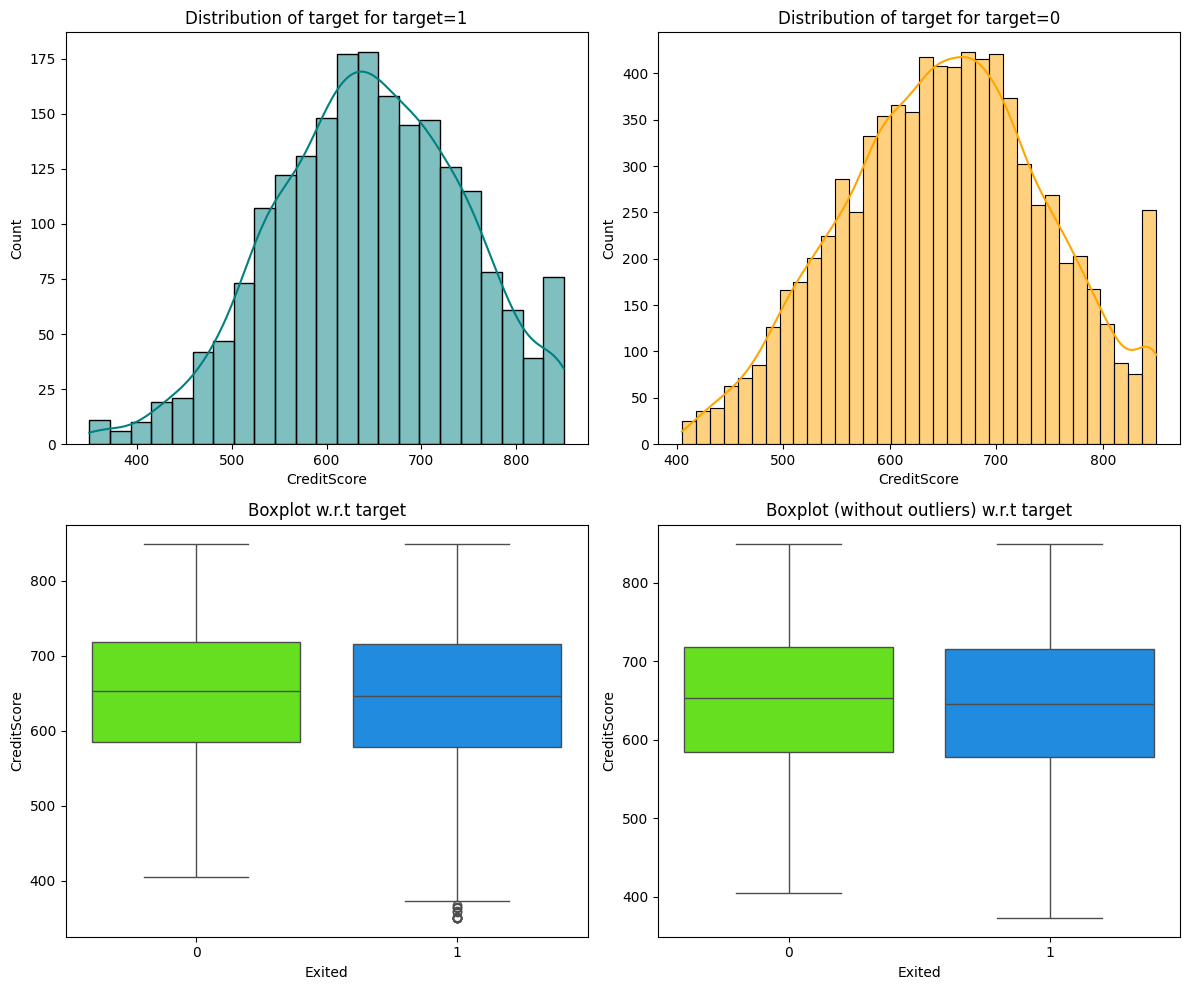

In [27]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")



*   Highest number of churns are found with customers in 600-700 credit score.
*   There are outliers in the credit score data of customers who exited but we will not treat them



##### Age vs Exited

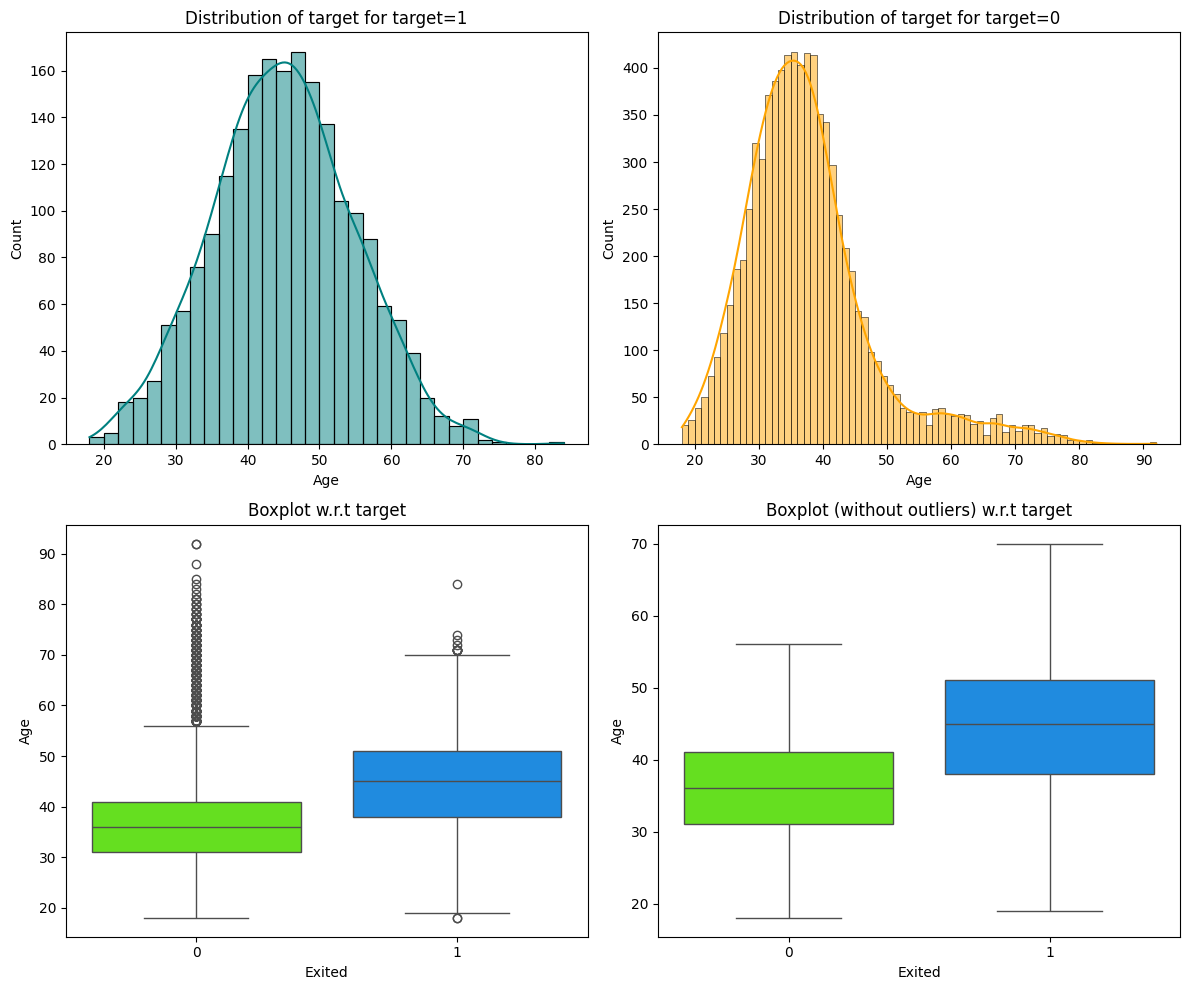

In [28]:
distribution_plot_wrt_target(data, "Age", "Exited")



*   Customers aged 40-50 are more likely to exit than other less aged customers



##### Tenure vs Exited

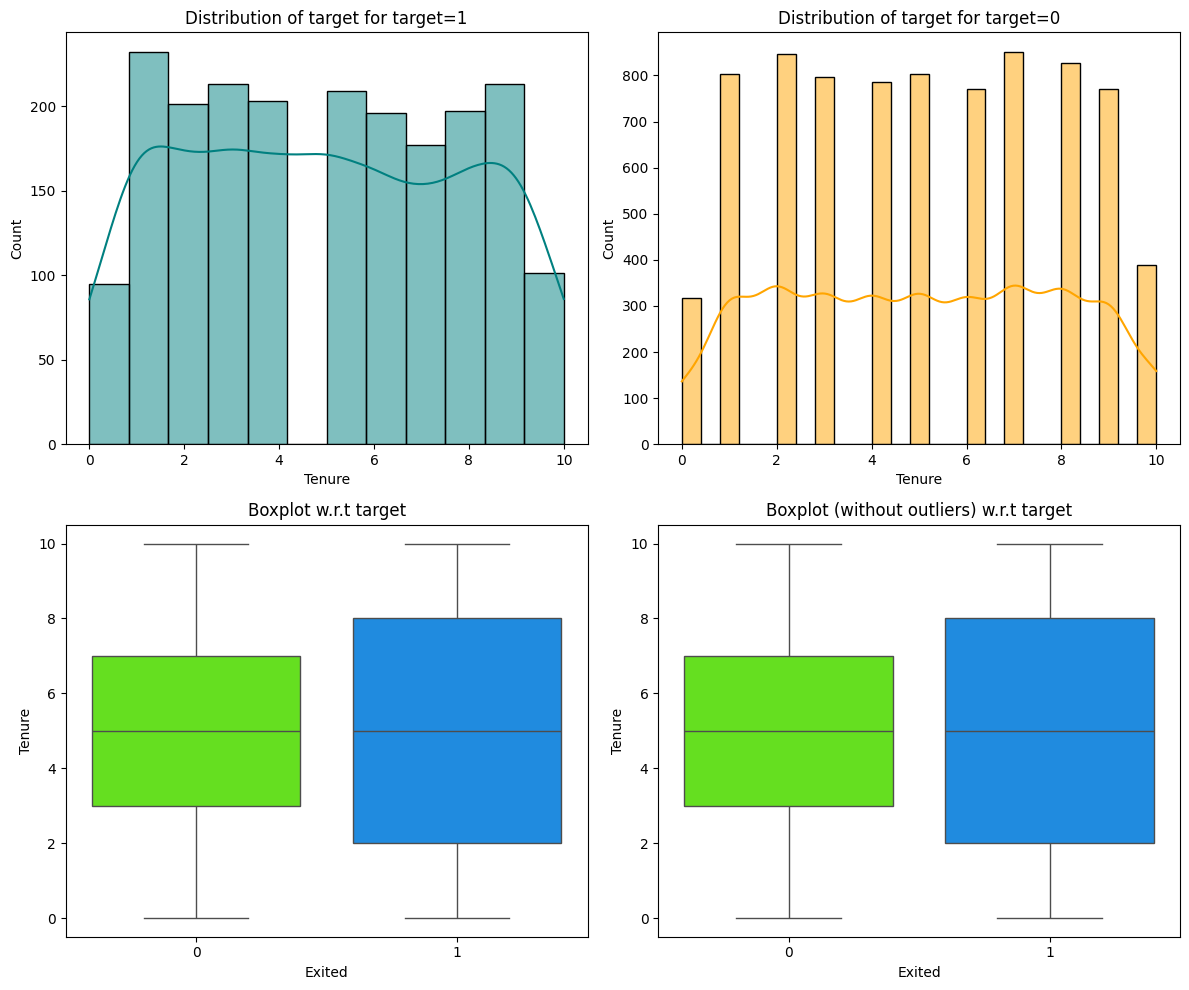

In [29]:
distribution_plot_wrt_target(data, "Tenure", "Exited")



*   25% of customers with less than 2 years tenure are more likely to exit than longer tenure customers.
*    50% of the csutomers who exited were less than 5 years with the bank.



##### Balance vs Exited

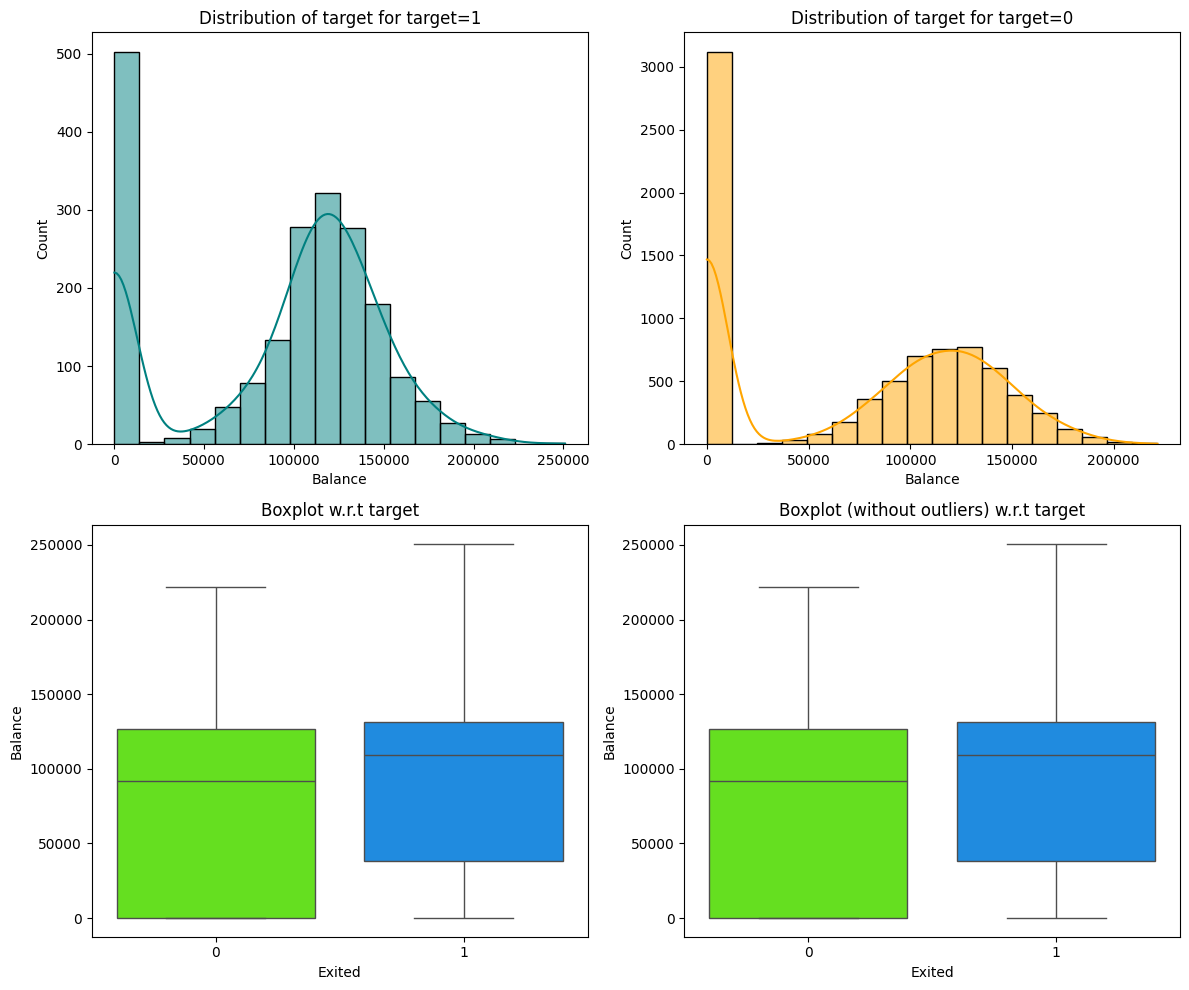

In [30]:
distribution_plot_wrt_target(data, "Balance", "Exited")



*   Customers with no balance are more likely to exit that customers having some balance.



##### NumofProducts vs Exited

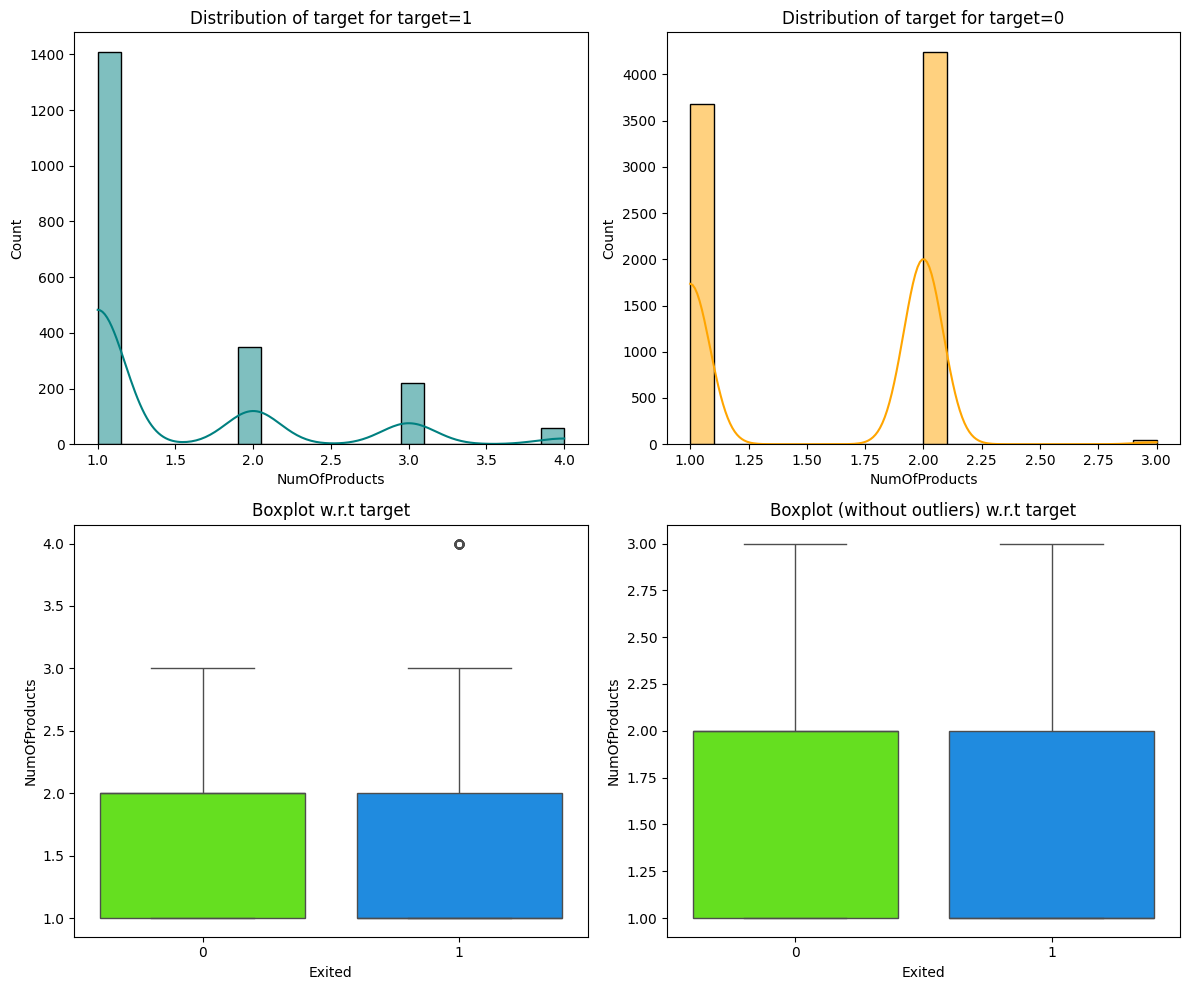

In [31]:
distribution_plot_wrt_target(data, "NumOfProducts", "Exited")



*   Customer using more number of bank products is less likely to churn
*   Customers having 1 product is more likely to churn than others.



##### EstimatedSalary vs Exited

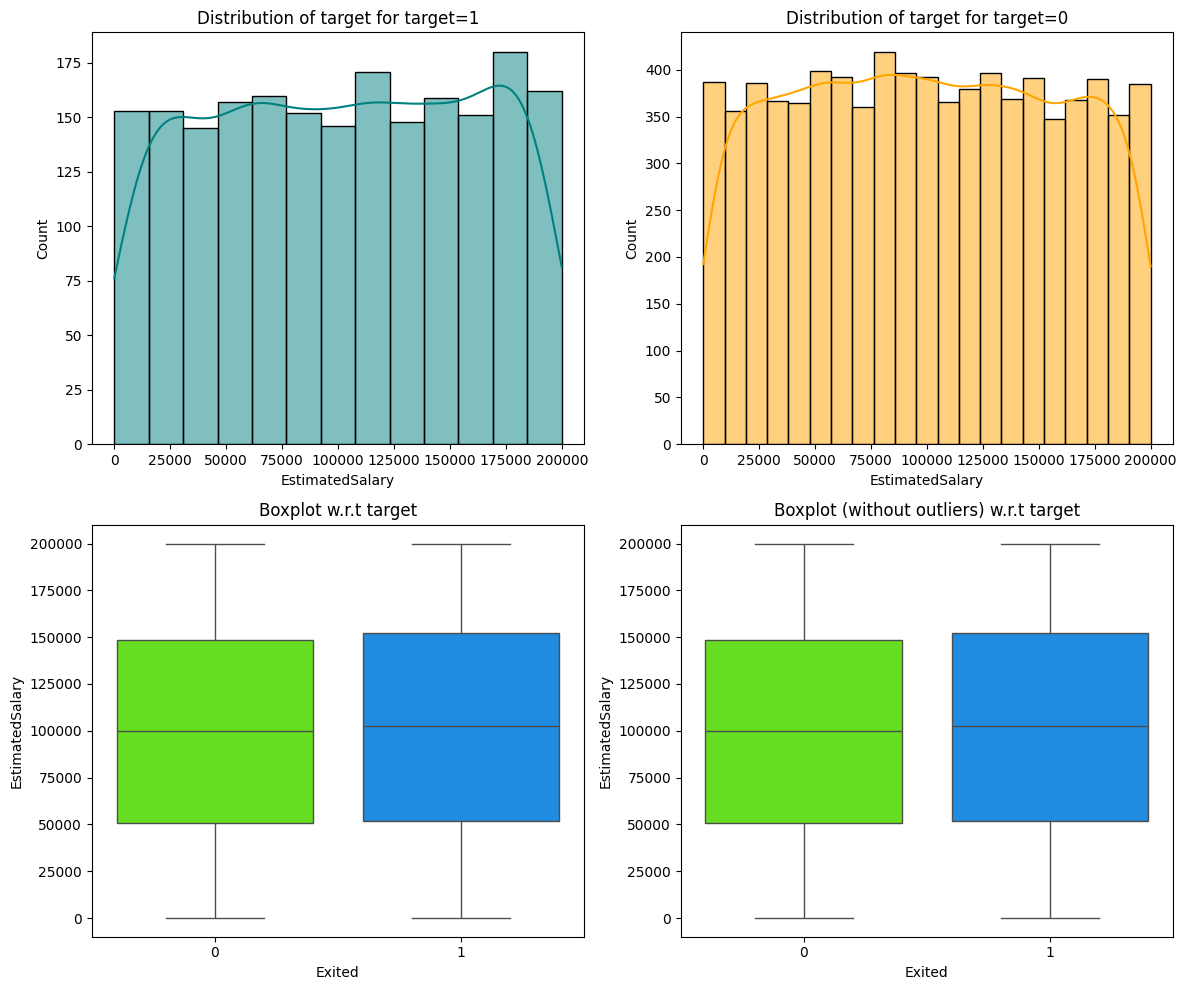

In [32]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")



*   50% of the customers who exited had EstimatedSalary less than 100000




##### HasCrCard vs Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


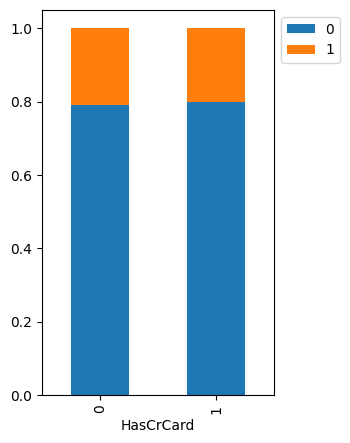

In [33]:
stacked_barplot(data, "HasCrCard", "Exited")


*   close to 20% of the customers with or without credit card are more likely to churn

*   churn segment in both the groups are roughly similar in size and hence credit card ownership may not be strong predictor of churn in this dataset




##### IsActiveMember vs Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


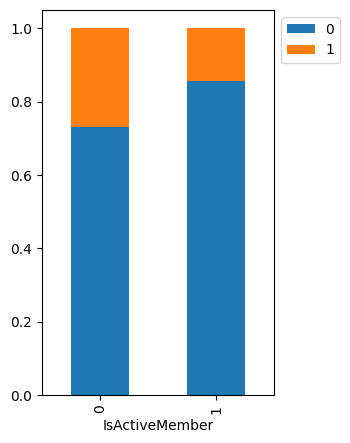

In [34]:
stacked_barplot(data, "IsActiveMember", "Exited")



*   ActiveMember customers are less likely to churn




##### Gender vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


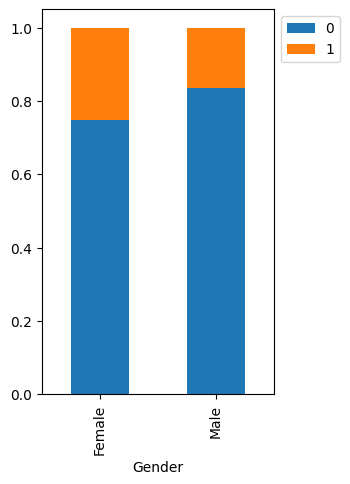

In [35]:
stacked_barplot(data, "Gender", "Exited")



*   Female Bank customers are more likely to churn than male customers.



##### Geography vs Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


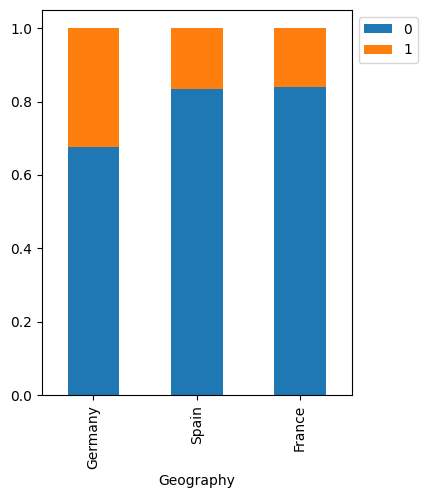

In [36]:
stacked_barplot(data, "Geography", "Exited")



*   Germany has more customer exits than France and Spain




#### HeatMap

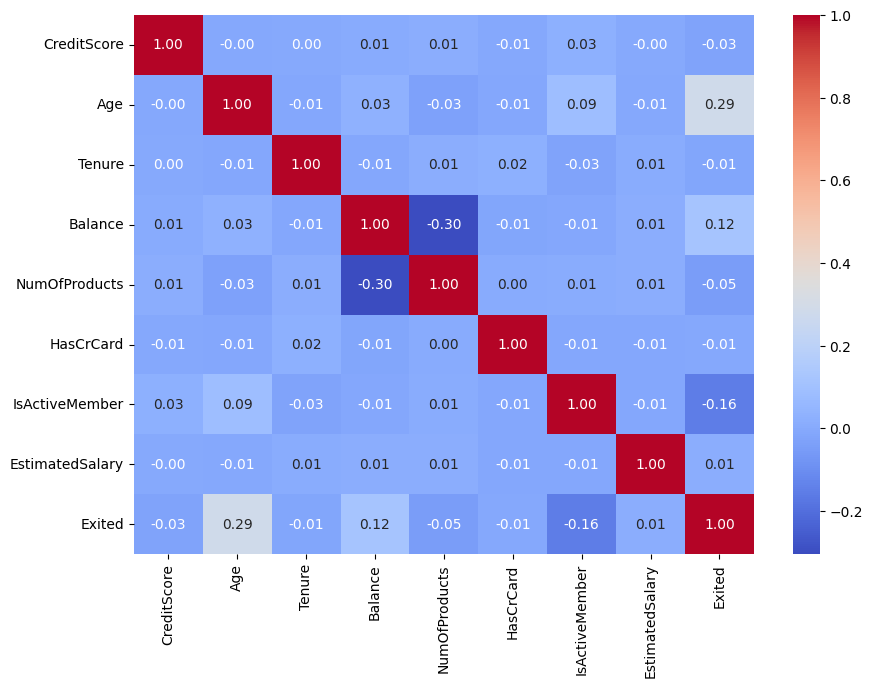

In [37]:
# defining the figure size
plt.figure(figsize=(10, 7))

# plotting the correlation heatmap
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');



*   Age and Balance are positively correlated with the target variable Exited.
* Age has a higher positive correlation than Balance.
*  CreditScore,Tenure,NumberofProducts,HasCrCard , are negatively correlated with the target variable.
* Balance and NumOfProducts are strongly negative correlated
* isActiveMember and Exited has higher negative correlation



### Scatter Plot

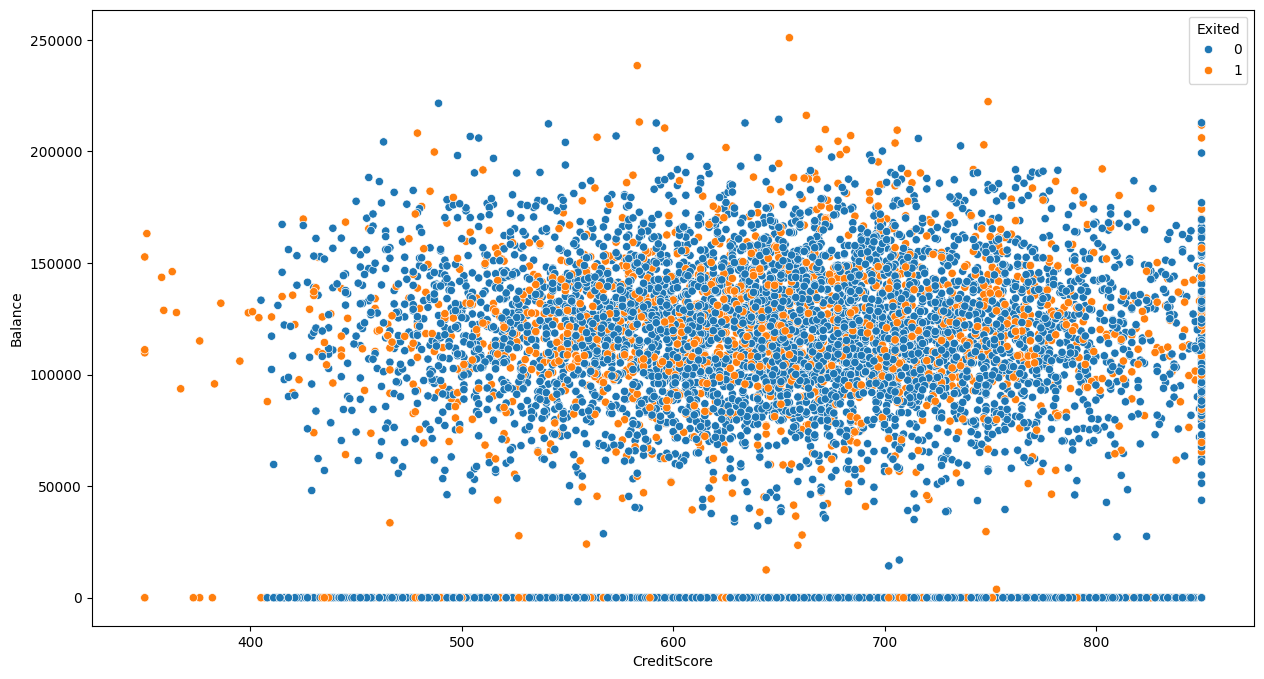

In [38]:
# CreditScore vs Balance
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,
           x='CreditScore',
           y='Balance',
           hue='Exited',
           );

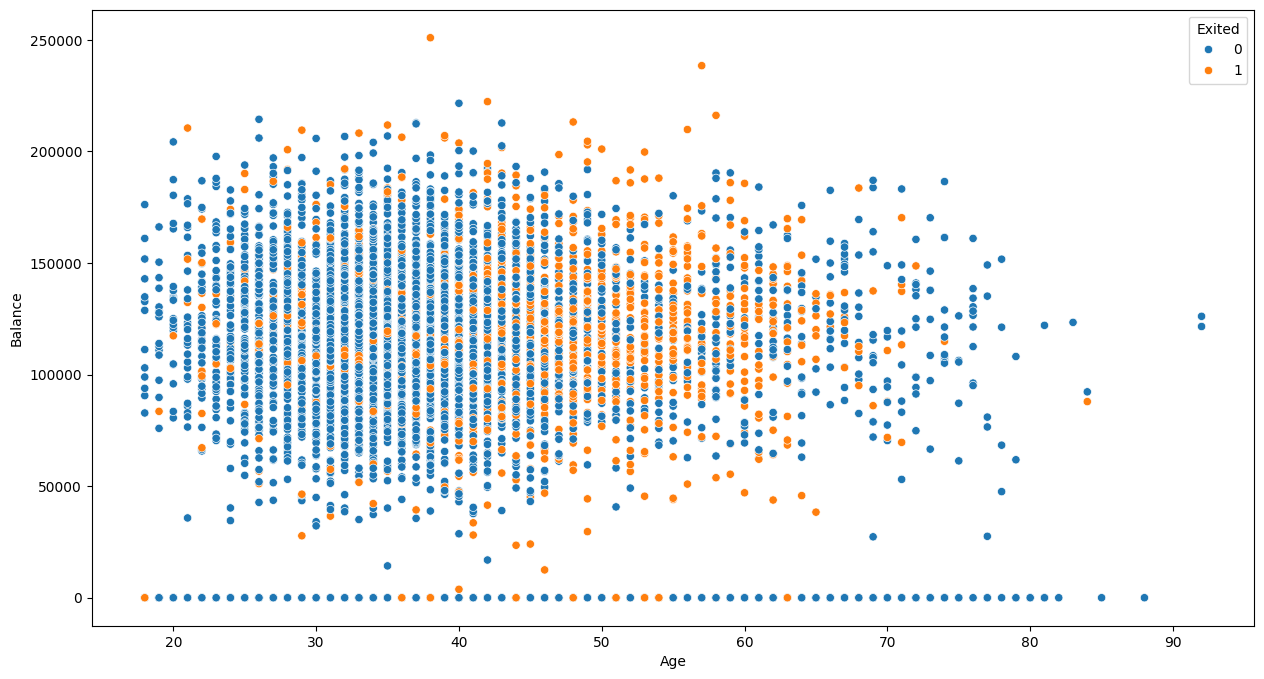

In [39]:
# Age vs Balance
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,
           x='Age',
           y='Balance',
           hue='Exited',
           );

### Pair Plot


<Figure size 10000x10000 with 0 Axes>

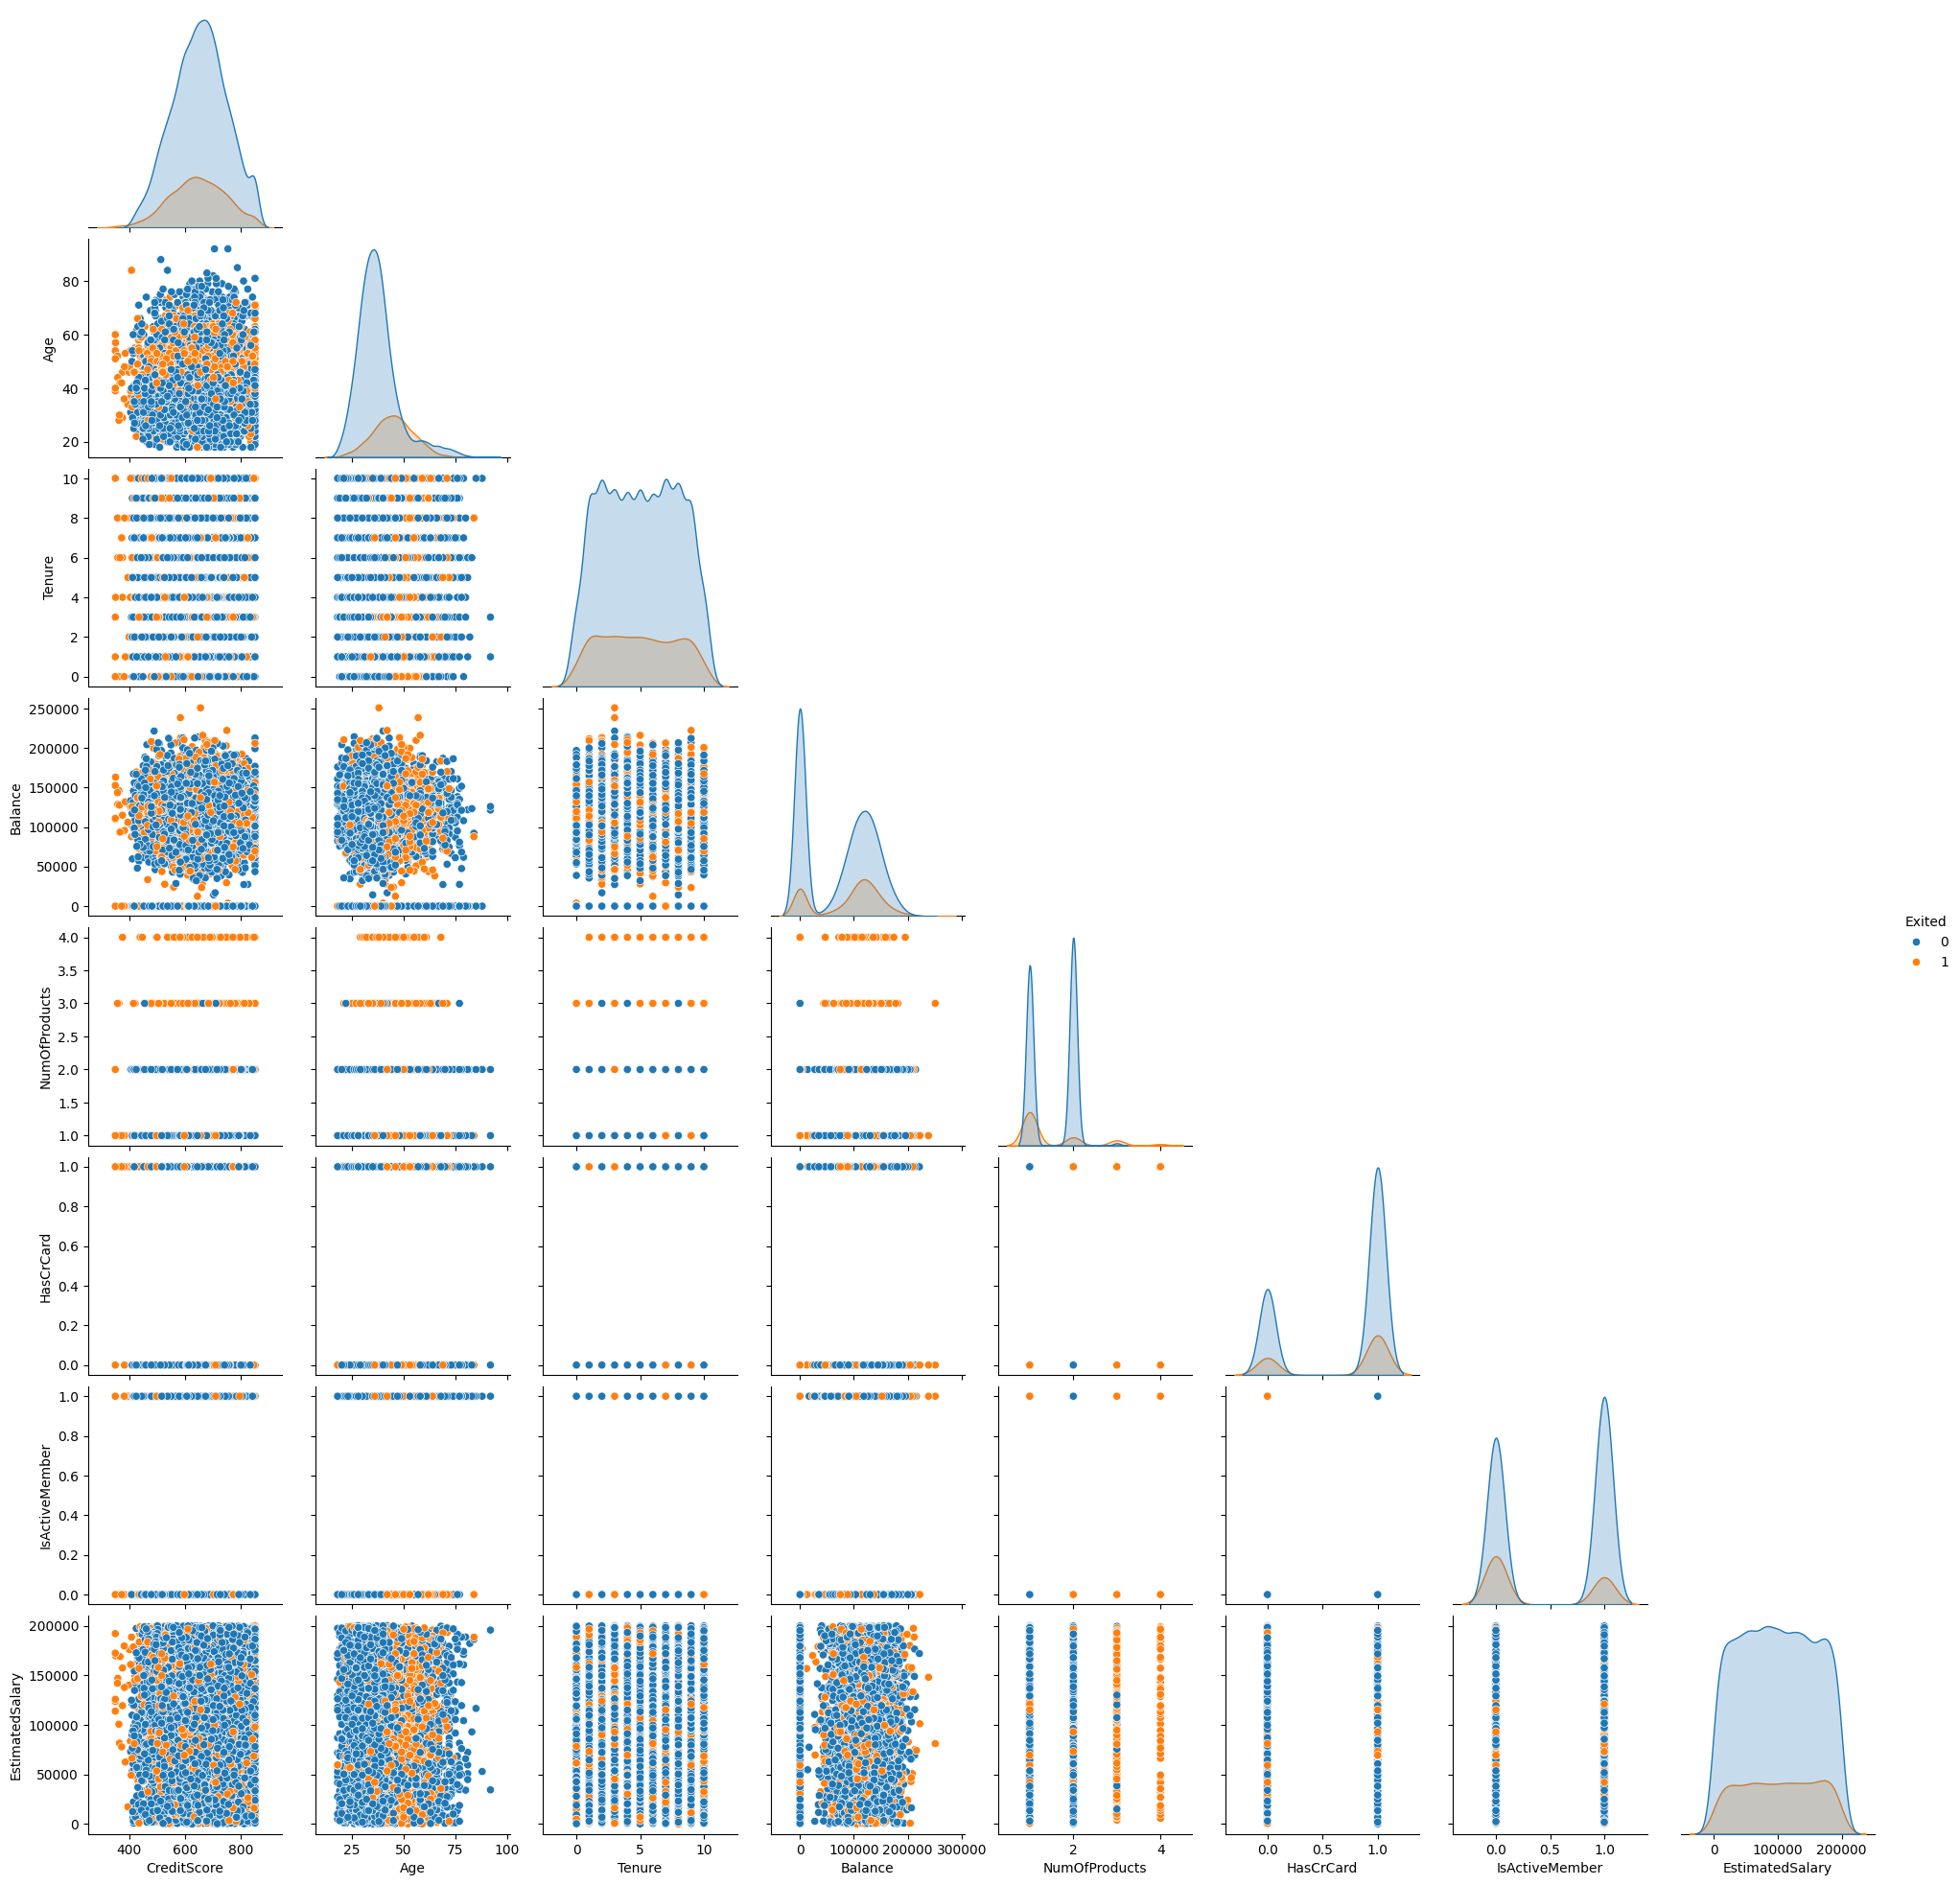

In [40]:
# Pair plot matrix
plt.figure(figsize=(100, 100))
sns.pairplot(data,corner=True,hue="Exited")
plt.show();

## Data Preprocessing

### Encoding the categorical variables
Dummy Variable Creation

In [41]:
# Encoding the categorical variables using one-hot encoding
data = pd.get_dummies(
    data,
    columns=["Geography","Gender"],
    drop_first=True,dtype=int
)

In [42]:
data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

### Train-validation-test Split

In [43]:
X = data.drop("Exited", axis=1)
y = data["Exited"]

In [44]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = 42,stratify = y_temp)

In [46]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)




*   X_train has 6400 records with 11 columns , X_valid has 1600 records with 11 columns, and X_test has 2000 records with 11 columns



### Data Normalization

In [47]:
X_train.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
3006          747   45       1  114959.12              1          1   
5735          585   44       4       0.00              2          0   
5652          691   29       9       0.00              2          0   
26            756   36       2  136815.64              1          1   
3596          643   36       0  148159.71              1          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
3006               0        189362.39                  0                0   
5735               1        101728.46                  0                1   
5652               0        199635.93                  0                0   
26                 1        170041.95                  1                0   
3596               0         55835.66                  0                0   

      Gender_Male  
3006            0  
5735            0  
5652            0  
26              1  
3596            1

In [48]:
#Transform numerical features to a common scale
# defining the list of numerical features to normalize
num_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_val[num_features] = scaler.transform(X_val[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [49]:
X_train.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
3006     0.988678  0.572685 -1.384980  0.610704      -0.909878          1   
5735    -0.683985  0.477619 -0.355056 -1.237347       0.804346          0   
5652     0.410474 -0.948376  1.361485 -1.237347       0.804346          0   
26       1.081604 -0.282911 -1.041672  0.962063      -0.909878          1   
3596    -0.085130 -0.282911 -1.728288  1.144427      -0.909878          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
3006               0         1.566070                  0                0   
5735               1         0.036348                  0                1   
5652               0         1.745403                  0                0   
26                 1         1.228816                  1                0   
3596               0        -0.764748                  0                0   

      Gender_Male  
3006            0  
5735            0  
5652            0  
26              1  
3596            1



*   Numerical data is normalized(standardized) using z-score normalization.Categorical features like gender,geography is not normalized.
*   Normalization Centers the numerical features around zero mean and unit standard deviation



## Model Building

#### Utlility Functions

In [50]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1

    The choice of the threshold depends on the specific business problem and the desired balance between different types of errors:

    Higher Threshold (e.g., 0.7): This leads to higher precision (fewer false positives) but lower recall (more false negatives).
    It's suitable when the cost of false positives is high, like in spam detection.
    Lower Threshold (e.g., 0.3): This leads to higher recall (fewer false negatives) but lower precision (more false positives).
    It's suitable when the cost of false negatives is high, like in disease diagnosis.

    Using threshold of 0.5 in this case

    """


    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold

    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.


### Model can make wrong predictions as:
* Predicting a customer will leave but the customer will not exit.
* Predicting a customer will not leave and  the customer exits.

### Which case is more important?
* Predicting that the customer will not exits but in reality customer exits is a huge loss to the bank

### How to reduce this loss i.e need to reduce False Negative?
* Bank  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negatives or in other words identifying the True Positive(i.e. Class 1) so that the Bank can identify the real customer who will leave the Bank.




-


### Fixing the seed for random number generators

First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results everytime we run the code.

In [52]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

### Calculate Class Weights

In [53]:
#Proportion of target data distribution
data['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

while an 80:20 class ratio might not be a severe imbalance, we will use class weights to check if it improve the model's performance on the minority class and prevent bias

In [54]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

### Neural Network with SGD Optimizer

#### Model0: Neural Network of 14, 7 and 1 layers without class weights

- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer
  - Class Weights not used
  - **epochs=25**
  - batchsize = 64

In [55]:
# defining the batch size and # epochs
epochs = 25
batch_size = 64

In [56]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [57]:
#Initializing the neural network of 14,7,1
model0 = Sequential()

#First Hidden Layer
model0.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model0.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model0.add(Dense(1,activation="sigmoid"))

In [58]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model0.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [60]:
start = time.time()
history0 = model0.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),batch_size=batch_size,verbose=2)
end=time.time()

Epoch 1/25
100/100 - 2s - 22ms/step - accuracy: 0.7902 - loss: 0.5177 - val_accuracy: 0.7937 - val_loss: 0.4865
Epoch 2/25
100/100 - 1s - 13ms/step - accuracy: 0.7964 - loss: 0.4693 - val_accuracy: 0.7937 - val_loss: 0.4723
Epoch 3/25
100/100 - 1s - 5ms/step - accuracy: 0.7966 - loss: 0.4587 - val_accuracy: 0.7937 - val_loss: 0.4649
Epoch 4/25
100/100 - 0s - 4ms/step - accuracy: 0.7962 - loss: 0.4518 - val_accuracy: 0.7944 - val_loss: 0.4594
Epoch 5/25
100/100 - 0s - 3ms/step - accuracy: 0.7987 - loss: 0.4465 - val_accuracy: 0.7956 - val_loss: 0.4549
Epoch 6/25
100/100 - 1s - 6ms/step - accuracy: 0.8005 - loss: 0.4421 - val_accuracy: 0.7956 - val_loss: 0.4512
Epoch 7/25
100/100 - 1s - 7ms/step - accuracy: 0.8025 - loss: 0.4384 - val_accuracy: 0.7969 - val_loss: 0.4481
Epoch 8/25
100/100 - 0s - 4ms/step - accuracy: 0.8055 - loss: 0.4352 - val_accuracy: 0.7987 - val_loss: 0.4454
Epoch 9/25
100/100 - 1s - 5ms/step - accuracy: 0.8084 - loss: 0.4324 - val_accuracy: 0.7981 - val_loss: 0.4429

In [61]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.092943668365479


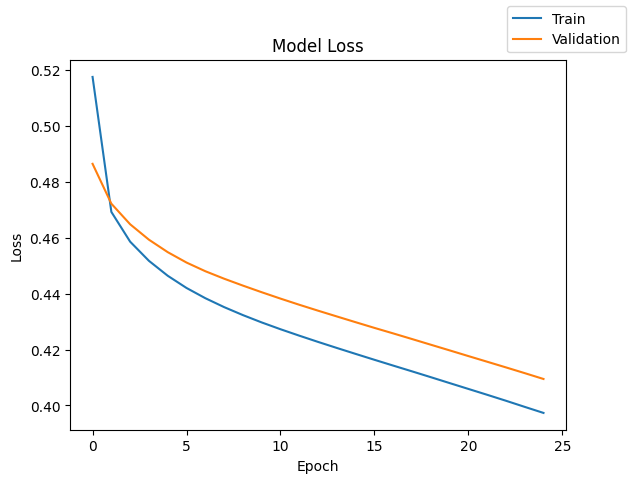

In [62]:
plot(history0,'loss')

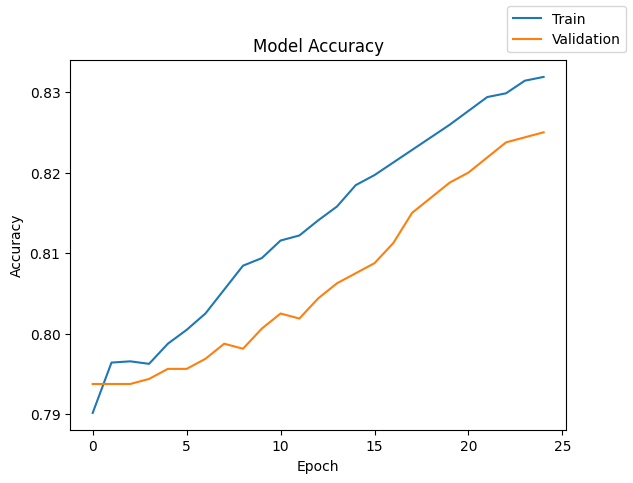

In [63]:
plot(history0,'accuracy')

**Observations:**

- The training accuracy is increasing with the increase in the epochs
- Validation accuracy is increasing with epochs

In [64]:
model0_train_perf = model_performance_classification(model0,X_train,y_train)
model0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.833281  0.833281   0.821079  0.801198

In [65]:
model0_val_perf = model_performance_classification(model0,X_val,y_val)
model0_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.825   0.825   0.806742  0.790613

**Observations:**
* Model 0 training recall performance is around 83.3% and validation performance is also around 82.5%
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data.

 But Let's try couple more changes to the model and analyse further

#### Model1: Neural Network of 14,7 and 1 layers without class weights and with momentum

Build Model with
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - **SGD as the optimizer**
  - Class Weights not used
  - **Momentum used**
  - **epochs = 25**
  - batchsize = 64

In [66]:
# defining the batch size and # epochs
epochs = 25
batch_size = 64

In [67]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [68]:
#Initializing the neural network of 14,7 and 1
model1 = Sequential()

#First Hidden Layer
model1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model1.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model1.add(Dense(1,activation="sigmoid"))

In [69]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer with momentum to be used
model1.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [71]:
start = time.time()
history1 = model1.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),batch_size=batch_size,verbose=2)
end = time.time()

Epoch 1/25
100/100 - 2s - 15ms/step - accuracy: 0.7477 - loss: 0.5449 - val_accuracy: 0.7962 - val_loss: 0.4846
Epoch 2/25
100/100 - 0s - 4ms/step - accuracy: 0.7962 - loss: 0.4708 - val_accuracy: 0.7956 - val_loss: 0.4486
Epoch 3/25
100/100 - 1s - 6ms/step - accuracy: 0.7966 - loss: 0.4382 - val_accuracy: 0.8025 - val_loss: 0.4266
Epoch 4/25
100/100 - 1s - 5ms/step - accuracy: 0.8008 - loss: 0.4228 - val_accuracy: 0.8081 - val_loss: 0.4157
Epoch 5/25
100/100 - 1s - 6ms/step - accuracy: 0.8087 - loss: 0.4125 - val_accuracy: 0.8213 - val_loss: 0.4050
Epoch 6/25
100/100 - 0s - 3ms/step - accuracy: 0.8141 - loss: 0.4034 - val_accuracy: 0.8281 - val_loss: 0.3946
Epoch 7/25
100/100 - 0s - 3ms/step - accuracy: 0.8205 - loss: 0.3918 - val_accuracy: 0.8388 - val_loss: 0.3797
Epoch 8/25
100/100 - 0s - 4ms/step - accuracy: 0.8372 - loss: 0.3765 - val_accuracy: 0.8500 - val_loss: 0.3683
Epoch 9/25
100/100 - 1s - 5ms/step - accuracy: 0.8469 - loss: 0.3665 - val_accuracy: 0.8544 - val_loss: 0.3615


In [72]:
print("Time taken in seconds ",end-start)

Time taken in seconds  13.762194395065308


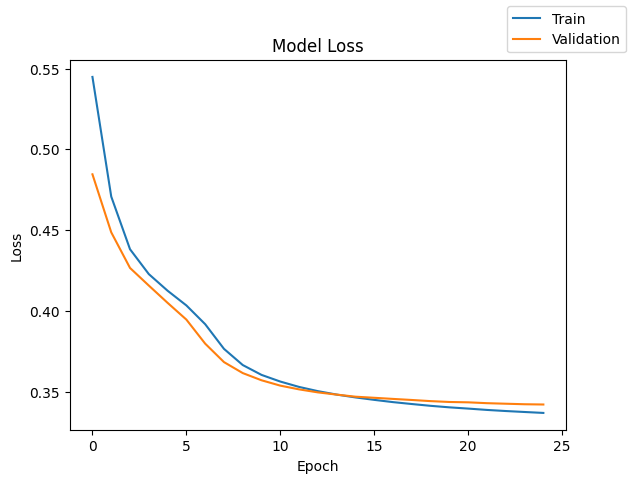

In [73]:
plot(history1,'loss')

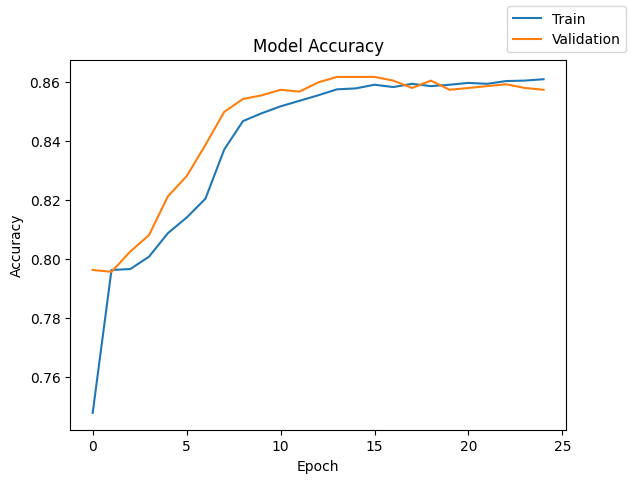

In [74]:
plot(history1,'accuracy')

In [75]:
model1_train_perf = model_performance_classification(model1,X_train,y_train)
model1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.862031  0.862031   0.852781  0.849874

In [76]:
model1_val_perf = model_performance_classification(model1,X_val,y_val)
model1_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8575  0.8575   0.847249  0.844355

**Observations:**
* Model1 has training recall of 86.2% and validation recall of 85.75%
* Time taken to run this model is more around 13s-14s
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data. But Let's try couple more changes to the model and analyse furthers
* Model1 performace with momentum is better than Model0



#### Model2: Neural Network of 14,7 and 1 layers without class weights , with epochs=50

Build Model with
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - **SGD as the optimizer**
  - Class Weights not used
  - **Momentum used**
  - **epochs = 50**
    - batchsize = 64

In [77]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [78]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [79]:
#Initializing the neural network of 14,7 and 1
model2 = Sequential()

#First Hidden Layer
model2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model2.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model2.add(Dense(1,activation="sigmoid"))

In [80]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer with momentum to be used
model2.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [82]:
start = time.time()
history2 = model2.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),batch_size=batch_size,verbose=2)
end = time.time()

Epoch 1/50
100/100 - 1s - 12ms/step - accuracy: 0.5780 - loss: 0.7006 - val_accuracy: 0.7631 - val_loss: 0.6026
Epoch 2/50
100/100 - 1s - 7ms/step - accuracy: 0.7894 - loss: 0.5647 - val_accuracy: 0.7969 - val_loss: 0.5361
Epoch 3/50
100/100 - 0s - 3ms/step - accuracy: 0.7962 - loss: 0.5240 - val_accuracy: 0.7962 - val_loss: 0.5121
Epoch 4/50
100/100 - 1s - 7ms/step - accuracy: 0.7964 - loss: 0.5074 - val_accuracy: 0.7962 - val_loss: 0.5010
Epoch 5/50
100/100 - 1s - 6ms/step - accuracy: 0.7966 - loss: 0.4983 - val_accuracy: 0.7962 - val_loss: 0.4941
Epoch 6/50
100/100 - 0s - 4ms/step - accuracy: 0.7967 - loss: 0.4915 - val_accuracy: 0.7962 - val_loss: 0.4886
Epoch 7/50
100/100 - 1s - 6ms/step - accuracy: 0.7964 - loss: 0.4854 - val_accuracy: 0.7956 - val_loss: 0.4835
Epoch 8/50
100/100 - 1s - 6ms/step - accuracy: 0.7966 - loss: 0.4798 - val_accuracy: 0.7956 - val_loss: 0.4787
Epoch 9/50
100/100 - 0s - 5ms/step - accuracy: 0.7973 - loss: 0.4746 - val_accuracy: 0.7962 - val_loss: 0.4742


In [83]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.28948974609375


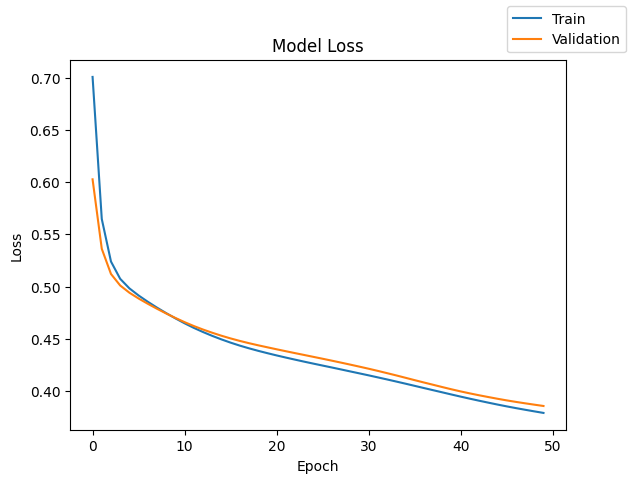

In [84]:
plot(history2,'loss')

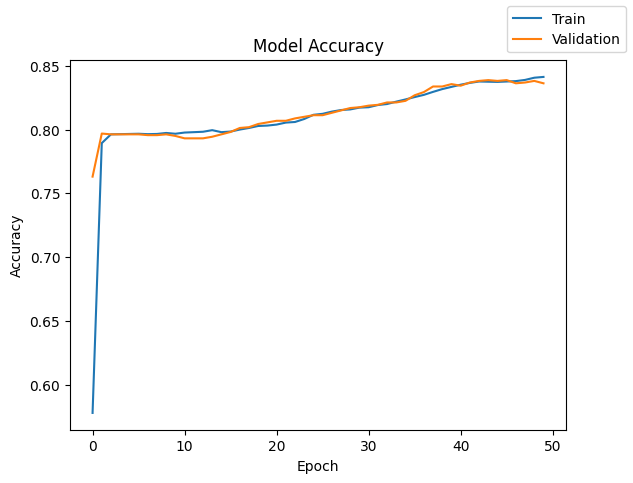

In [85]:
plot(history2,'accuracy')

In [86]:
model2_train_perf = model_performance_classification(model2,X_train,y_train)
model2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.841406  0.841406   0.827612  0.820257

In [87]:
model2_val_perf = model_performance_classification(model2,X_val,y_val)
model2_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.83625  0.83625   0.820166  0.814844

**Observations:**
* Model2 has training recall of 84.1% and validation recall of 83.6%
* Time taken to run this model is more around 23s - 28s
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data. But Let's try couple more changes to the model and analyse furthers
*  Model 2 with epochs=50 has higher performance than Model0 with epochs=25
* We will use epochs=50 for the rest of the models


#### Model3: Neural Network of 14, 7 and 1 layers without Batch Size defined ,with class weights

Build Neural Network
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer
  - No batchsize
  - Class Weights used

In [88]:
# defining the batch size and # epochs
epochs = 50

In [89]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [90]:
#Initializing the neural network of 14,7 and 1
model3 = Sequential()

#First Hidden Layer
model3.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model3.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model3.add(Dense(1,activation="sigmoid"))

In [91]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model3.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [93]:
start = time.time()
history3 = model3.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),class_weight=cw_dict,verbose=2)
end = time.time()

Epoch 1/50
200/200 - 2s - 9ms/step - accuracy: 0.6136 - loss: 1.4176 - val_accuracy: 0.6081 - val_loss: 0.6392
Epoch 2/50
200/200 - 1s - 3ms/step - accuracy: 0.6255 - loss: 1.3146 - val_accuracy: 0.6612 - val_loss: 0.6015
Epoch 3/50
200/200 - 1s - 3ms/step - accuracy: 0.6675 - loss: 1.2558 - val_accuracy: 0.6762 - val_loss: 0.5747
Epoch 4/50
200/200 - 1s - 4ms/step - accuracy: 0.6819 - loss: 1.2100 - val_accuracy: 0.6881 - val_loss: 0.5624
Epoch 5/50
200/200 - 1s - 7ms/step - accuracy: 0.6873 - loss: 1.1753 - val_accuracy: 0.6956 - val_loss: 0.5561
Epoch 6/50
200/200 - 1s - 5ms/step - accuracy: 0.6953 - loss: 1.1498 - val_accuracy: 0.7031 - val_loss: 0.5528
Epoch 7/50
200/200 - 1s - 3ms/step - accuracy: 0.7006 - loss: 1.1299 - val_accuracy: 0.7075 - val_loss: 0.5480
Epoch 8/50
200/200 - 1s - 3ms/step - accuracy: 0.7067 - loss: 1.1124 - val_accuracy: 0.7119 - val_loss: 0.5414
Epoch 9/50
200/200 - 1s - 3ms/step - accuracy: 0.7123 - loss: 1.0963 - val_accuracy: 0.7206 - val_loss: 0.5333
E

In [94]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.23708438873291


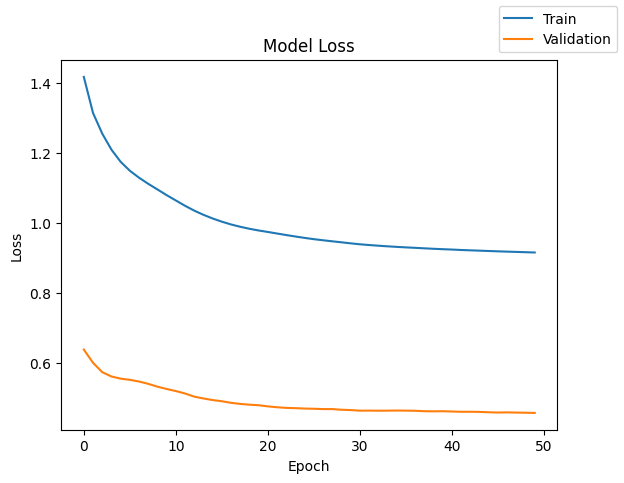

In [95]:
plot(history3,'loss')

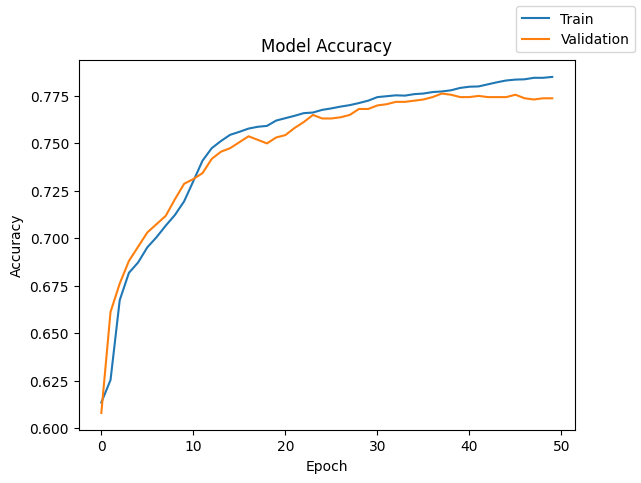

In [96]:
plot(history3,'accuracy')

In [97]:
model3_train_perf = model_performance_classification(model3,X_train,y_train)
model3_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.789687  0.789687   0.840805  0.804722

In [98]:
model3_val_perf = model_performance_classification(model3,X_val,y_val)
model3_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.77375  0.77375   0.833078   0.79096

**Observations:**
* Model3 has training recall of 78.9% and validation recall of 77%
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data.
* Model3 performance is not that well as other models
 But Let's try couple more changes to the model and analyse furthers

* Let's batchsize this model and see next


#### Model4: Neural Network of 14,7 and 1 layers with batch size ,class weights

 Build Neural Network
 - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer
  -** Class Weights used**
  - epochs=50
  - batchsize = 64

In [99]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [100]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [101]:
#Initializing the neural network of 14,7,1
model4 = Sequential()

#First Hidden Layer
model4.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model4.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model4.add(Dense(1,activation="sigmoid"))

In [102]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model4.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [104]:
start = time.time()
history4 = model4.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),batch_size=batch_size,class_weight=cw_dict,verbose=2)
end=time.time()

Epoch 1/50
100/100 - 1s - 13ms/step - accuracy: 0.7422 - loss: 1.4103 - val_accuracy: 0.6956 - val_loss: 0.6667
Epoch 2/50
100/100 - 1s - 7ms/step - accuracy: 0.6241 - loss: 1.3718 - val_accuracy: 0.6256 - val_loss: 0.6783
Epoch 3/50
100/100 - 0s - 3ms/step - accuracy: 0.6100 - loss: 1.3488 - val_accuracy: 0.6394 - val_loss: 0.6728
Epoch 4/50
100/100 - 0s - 4ms/step - accuracy: 0.6341 - loss: 1.3233 - val_accuracy: 0.6569 - val_loss: 0.6587
Epoch 5/50
100/100 - 1s - 6ms/step - accuracy: 0.6573 - loss: 1.2946 - val_accuracy: 0.6737 - val_loss: 0.6392
Epoch 6/50
100/100 - 0s - 4ms/step - accuracy: 0.6773 - loss: 1.2624 - val_accuracy: 0.6900 - val_loss: 0.6180
Epoch 7/50
100/100 - 0s - 3ms/step - accuracy: 0.6964 - loss: 1.2292 - val_accuracy: 0.7031 - val_loss: 0.5980
Epoch 8/50
100/100 - 0s - 4ms/step - accuracy: 0.7100 - loss: 1.1991 - val_accuracy: 0.7175 - val_loss: 0.5814
Epoch 9/50
100/100 - 0s - 4ms/step - accuracy: 0.7164 - loss: 1.1750 - val_accuracy: 0.7237 - val_loss: 0.5693


In [105]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.282581329345703


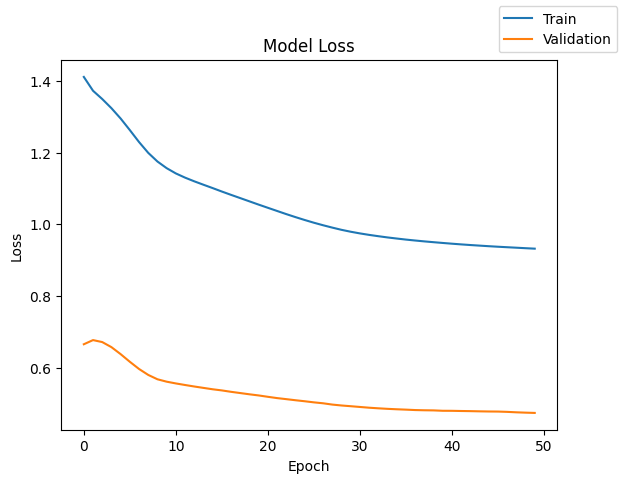

In [106]:
plot(history4,'loss')

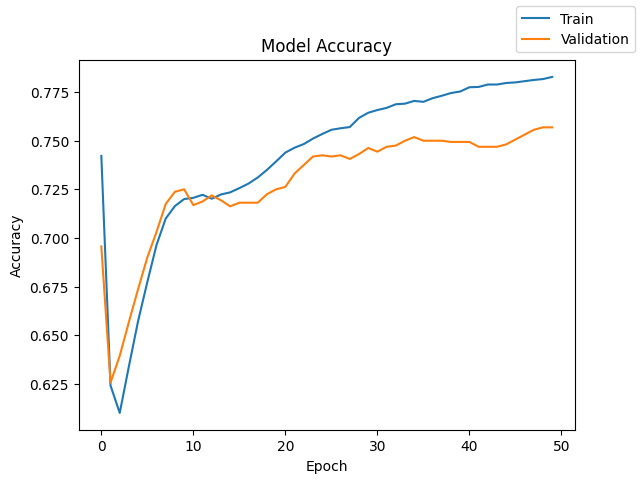

In [107]:
plot(history4,'accuracy')

In [108]:
model4_train_perf = model_performance_classification(model4,X_train,y_train)
model4_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.7775  0.7775   0.837294  0.794541

In [109]:
model4_val_perf = model_performance_classification(model4,X_val,y_val)
model4_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.756875  0.756875   0.826982  0.776645

**Observations:**
* Model3 has training recall of 77.8% and validation recall of around 75.6%
* Time taken to run this model is faster than Model2 as this model is done in batches
* Number of parameters is 281
* Train and validation recall performance are not that good.
* Model4 performance is not that good as Model3 and other models.



#### Model5: Neural Network of 32,16 and 1 layers with batchsize,class weights

 Build Neural Network
 - two hidden layers with 32 and 16 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer
  -** Class Weights used**
  - epochs=50
  - batchsize = 64

In [110]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [111]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [112]:
#Initializing the neural network of 32,16 and 1
model5 = Sequential()

#First Hidden Layer
model5.add(Dense(32,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model5.add(Dense(16,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model5.add(Dense(1,activation="sigmoid"))

In [113]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model5.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [115]:
start = time.time()
history5 = model5.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),class_weight=cw_dict,batch_size=batch_size,verbose=2)
end = time.time()

Epoch 1/50
100/100 - 2s - 15ms/step - accuracy: 0.6127 - loss: 1.3241 - val_accuracy: 0.6525 - val_loss: 0.6546
Epoch 2/50
100/100 - 0s - 5ms/step - accuracy: 0.6791 - loss: 1.2598 - val_accuracy: 0.6994 - val_loss: 0.6281
Epoch 3/50
100/100 - 0s - 3ms/step - accuracy: 0.7114 - loss: 1.2093 - val_accuracy: 0.7181 - val_loss: 0.6057
Epoch 4/50
100/100 - 0s - 3ms/step - accuracy: 0.7269 - loss: 1.1694 - val_accuracy: 0.7250 - val_loss: 0.5875
Epoch 5/50
100/100 - 0s - 3ms/step - accuracy: 0.7339 - loss: 1.1376 - val_accuracy: 0.7281 - val_loss: 0.5729
Epoch 6/50
100/100 - 1s - 7ms/step - accuracy: 0.7392 - loss: 1.1110 - val_accuracy: 0.7287 - val_loss: 0.5615
Epoch 7/50
100/100 - 1s - 5ms/step - accuracy: 0.7423 - loss: 1.0875 - val_accuracy: 0.7350 - val_loss: 0.5509
Epoch 8/50
100/100 - 1s - 6ms/step - accuracy: 0.7461 - loss: 1.0666 - val_accuracy: 0.7369 - val_loss: 0.5417
Epoch 9/50
100/100 - 1s - 6ms/step - accuracy: 0.7491 - loss: 1.0480 - val_accuracy: 0.7412 - val_loss: 0.5334


In [116]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.097063302993774


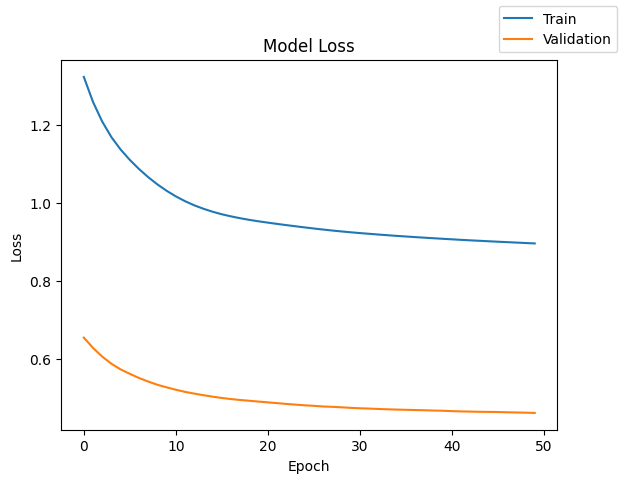

In [117]:
plot(history5,'loss')

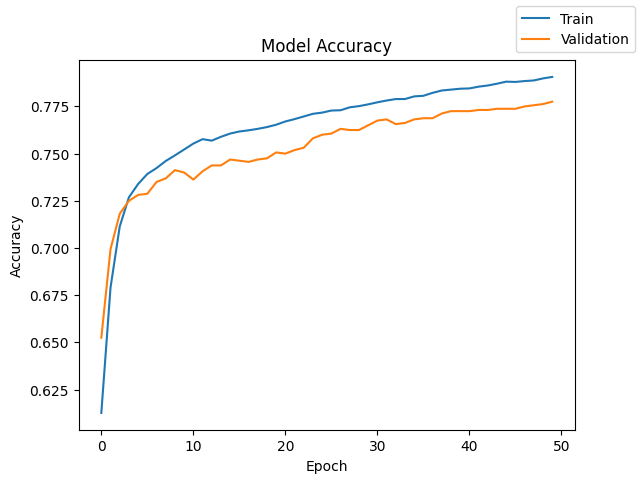

In [118]:
plot(history5,'accuracy')

In [119]:
model5_train_perf = model_performance_classification(model5,X_train,y_train)
model5_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.790937  0.790937   0.843698  0.806151

In [120]:
model5_val_perf = model_performance_classification(model5,X_val,y_val)
model5_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.7775  0.7775   0.833179  0.793943

**Observations:**
* Model5 has training recall of around 79% and validation recall of 77%.
* Number of parameters increaded to 929
* Train and validation recall performance are not that good.
* Model5 performance is not that good compared to other models
* Changing the node size (number of neurons) did not help much with performance.
* model5 is also not performing well
* we will use the 14,7 hidden layers neural network for further improvement

**We will use neural network of 14,7,1, batchsize=64,epochs=50, and without class weights to optimize further and make improvement **

## Model Performance Improvement

### Model6: Neural Network with Adam Optimizer
- Let's change the optimizer to Adam
    - This will introduce momentum as well as an adaptive learning rate
    

In [121]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [122]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [123]:
#Initializing the neural network of 14,7,1
model6 = Sequential()

#First Hidden Layer
model6.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model6.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model6.add(Dense(1,activation="sigmoid"))

In [124]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model6.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [126]:
start = time.time()
history6 = model6.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),batch_size=batch_size,verbose=2)
end=time.time()

Epoch 1/50
100/100 - 2s - 21ms/step - accuracy: 0.7786 - loss: 0.5406 - val_accuracy: 0.7969 - val_loss: 0.4902
Epoch 2/50
100/100 - 1s - 5ms/step - accuracy: 0.7977 - loss: 0.4623 - val_accuracy: 0.7994 - val_loss: 0.4531
Epoch 3/50
100/100 - 0s - 5ms/step - accuracy: 0.8045 - loss: 0.4362 - val_accuracy: 0.8081 - val_loss: 0.4344
Epoch 4/50
100/100 - 1s - 6ms/step - accuracy: 0.8125 - loss: 0.4216 - val_accuracy: 0.8175 - val_loss: 0.4231
Epoch 5/50
100/100 - 1s - 7ms/step - accuracy: 0.8183 - loss: 0.4108 - val_accuracy: 0.8200 - val_loss: 0.4139
Epoch 6/50
100/100 - 1s - 5ms/step - accuracy: 0.8272 - loss: 0.3995 - val_accuracy: 0.8294 - val_loss: 0.4032
Epoch 7/50
100/100 - 0s - 4ms/step - accuracy: 0.8348 - loss: 0.3861 - val_accuracy: 0.8419 - val_loss: 0.3922
Epoch 8/50
100/100 - 1s - 5ms/step - accuracy: 0.8395 - loss: 0.3766 - val_accuracy: 0.8475 - val_loss: 0.3837
Epoch 9/50
100/100 - 0s - 4ms/step - accuracy: 0.8461 - loss: 0.3699 - val_accuracy: 0.8544 - val_loss: 0.3777


In [127]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.39774799346924


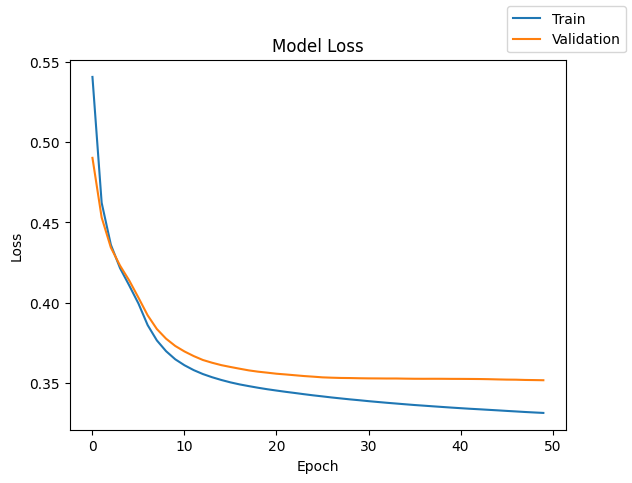

In [128]:
plot(history6,'loss')

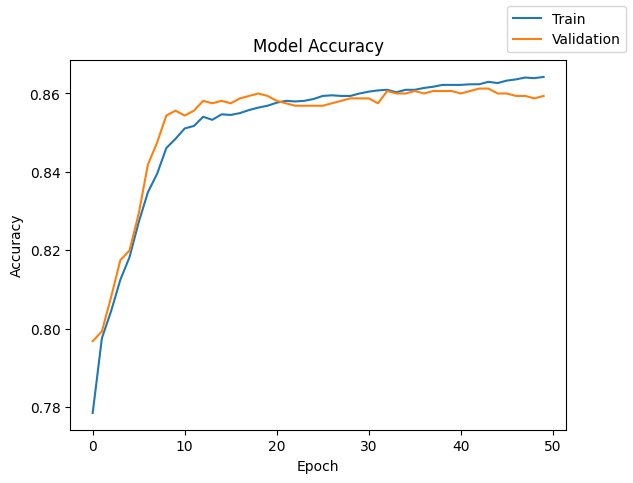

In [129]:
plot(history6,'accuracy')

In [130]:
model6_train_perf = model_performance_classification(model6,X_train,y_train)
model6_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.864219  0.864219   0.855599  0.851926

In [131]:
model6_val_perf = model_performance_classification(model6,X_val,y_val)
model6_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.859375  0.859375   0.849714  0.845986

**Observations:**
* Model6 has training recall of 86.4% and validation recall of 85.9%
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data.

### Model7: Neural Network with Adam Optimizer and Dropout

In [132]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [133]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [134]:
#Initializing the neural network of 14,7,1
model7 = Sequential()

#First Hidden Layer
model7.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Adding Dropout to prevent overfitting
model7.add(Dropout(0.5))
#Second Hidden Layer
model7.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model7.add(Dense(1,activation="sigmoid"))

In [135]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model7.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [137]:
start = time.time()
history7 = model7.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),batch_size=batch_size,verbose=2)
end=time.time()

Epoch 1/50
100/100 - 3s - 34ms/step - accuracy: 0.5678 - loss: 0.6990 - val_accuracy: 0.7775 - val_loss: 0.5708
Epoch 2/50
100/100 - 0s - 5ms/step - accuracy: 0.7891 - loss: 0.5471 - val_accuracy: 0.7962 - val_loss: 0.4809
Epoch 3/50
100/100 - 0s - 3ms/step - accuracy: 0.7967 - loss: 0.4998 - val_accuracy: 0.7962 - val_loss: 0.4571
Epoch 4/50
100/100 - 0s - 3ms/step - accuracy: 0.7984 - loss: 0.4763 - val_accuracy: 0.7962 - val_loss: 0.4469
Epoch 5/50
100/100 - 1s - 6ms/step - accuracy: 0.7984 - loss: 0.4678 - val_accuracy: 0.7962 - val_loss: 0.4414
Epoch 6/50
100/100 - 0s - 3ms/step - accuracy: 0.7992 - loss: 0.4604 - val_accuracy: 0.7987 - val_loss: 0.4368
Epoch 7/50
100/100 - 0s - 3ms/step - accuracy: 0.8036 - loss: 0.4523 - val_accuracy: 0.8031 - val_loss: 0.4316
Epoch 8/50
100/100 - 1s - 6ms/step - accuracy: 0.8028 - loss: 0.4471 - val_accuracy: 0.8069 - val_loss: 0.4263
Epoch 9/50
100/100 - 0s - 3ms/step - accuracy: 0.8061 - loss: 0.4395 - val_accuracy: 0.8069 - val_loss: 0.4207


In [138]:
print("Time taken in seconds ",end-start)

Time taken in seconds  26.715410470962524


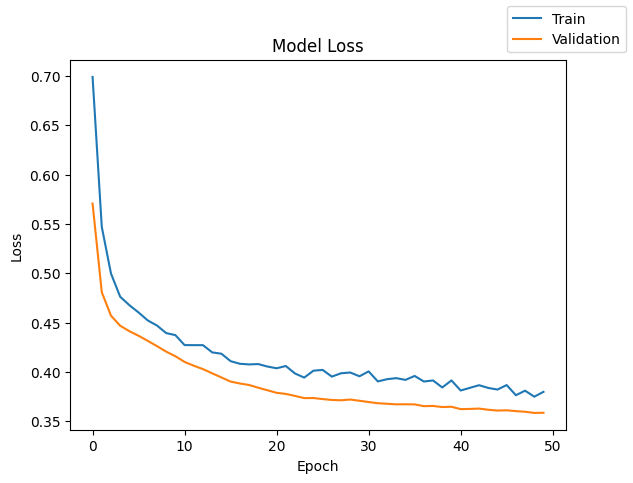

In [139]:
plot(history7,'loss')

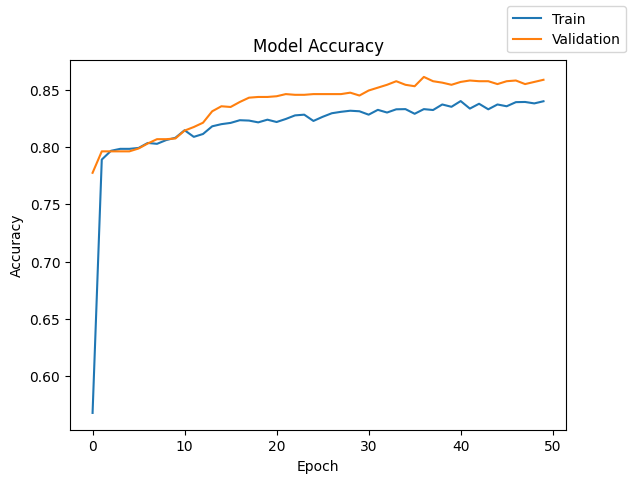

In [140]:
plot(history7,'accuracy')

In [141]:
model7_train_perf = model_performance_classification(model7,X_train,y_train)
model7_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.857969  0.857969   0.848112  0.843839

In [142]:
model7_val_perf = model_performance_classification(model7,X_val,y_val)
model7_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.85875  0.85875   0.849153   0.84459

**Observations:**
* Model7 has training recall of 85.8% and validation recall of 85.9%
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data. But Let's try couple more changes to the model and analyse furthers


### Balance Data with SMOTE , split test train data and Normalise Data

In [143]:
X = data.drop("Exited", axis=1)
y = data["Exited"]

In [144]:
# Before train-test split:
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)  # Apply SMOTE

In [145]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_btemp, X_btest, y_btemp, y_btest = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [146]:
# Splitting the Train dataset into the Training and Validation set.
X_btrain, X_bval, y_btrain, y_bval = train_test_split(X_btemp, y_btemp, test_size = 0.2, random_state = 42,stratify = y_btemp)

In [147]:
# Check synthetic resampled target count
y_resampled.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [148]:
#Printing the shapes.
print(X_btrain.shape,y_btrain.shape)
print(X_bval.shape,y_bval.shape)
print(X_btest.shape,y_btest.shape)

(10192, 11) (10192,)
(2548, 11) (2548,)
(3186, 11) (3186,)


In [149]:
#Transform numerical features to a common scale
# defining the list of numerical features to normalize
num_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler = StandardScaler()
X_btrain[num_features] = scaler.fit_transform(X_btrain[num_features])
X_bval[num_features] = scaler.transform(X_bval[num_features])
X_btest[num_features] = scaler.transform(X_btest[num_features])

### Model8 :Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [150]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [151]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [152]:
#Initializing the neural network of 14,7,1
model8 = Sequential()

#First Hidden Layer
model8.add(Dense(14,activation="relu",input_dim=X_btrain.shape[1]))

#Second Hidden Layer
model8.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model8.add(Dense(1,activation="sigmoid"))

In [153]:
model8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model8.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [155]:
start = time.time()
history8 = model8.fit(X_btrain, y_btrain, epochs=epochs, validation_data=(X_bval,y_bval),batch_size=batch_size,verbose=2)
end=time.time()

Epoch 1/50
160/160 - 2s - 15ms/step - accuracy: 0.6323 - loss: 0.6484 - val_accuracy: 0.6542 - val_loss: 0.6332
Epoch 2/50
160/160 - 1s - 3ms/step - accuracy: 0.6776 - loss: 0.6160 - val_accuracy: 0.6868 - val_loss: 0.6011
Epoch 3/50
160/160 - 0s - 3ms/step - accuracy: 0.7078 - loss: 0.5835 - val_accuracy: 0.7151 - val_loss: 0.5726
Epoch 4/50
160/160 - 1s - 4ms/step - accuracy: 0.7313 - loss: 0.5568 - val_accuracy: 0.7351 - val_loss: 0.5505
Epoch 5/50
160/160 - 1s - 4ms/step - accuracy: 0.7474 - loss: 0.5364 - val_accuracy: 0.7500 - val_loss: 0.5336
Epoch 6/50
160/160 - 1s - 3ms/step - accuracy: 0.7557 - loss: 0.5212 - val_accuracy: 0.7563 - val_loss: 0.5208
Epoch 7/50
160/160 - 1s - 3ms/step - accuracy: 0.7604 - loss: 0.5095 - val_accuracy: 0.7578 - val_loss: 0.5108
Epoch 8/50
160/160 - 0s - 3ms/step - accuracy: 0.7655 - loss: 0.5002 - val_accuracy: 0.7614 - val_loss: 0.5027
Epoch 9/50
160/160 - 0s - 3ms/step - accuracy: 0.7697 - loss: 0.4926 - val_accuracy: 0.7657 - val_loss: 0.4960


In [156]:
print("Time taken in seconds ",end-start)

Time taken in seconds  32.02013039588928


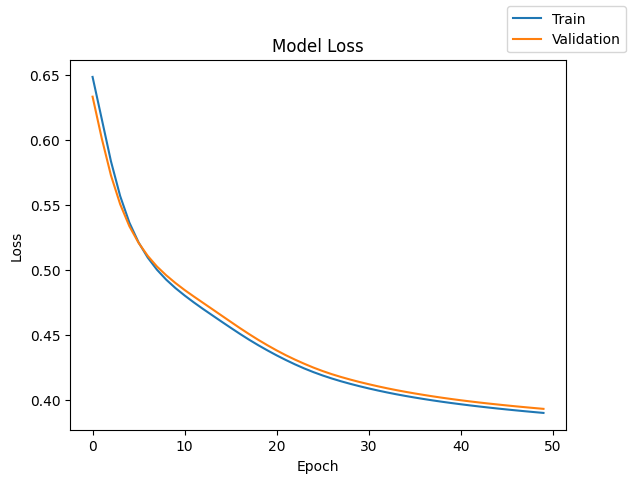

In [157]:
plot(history8,'loss')

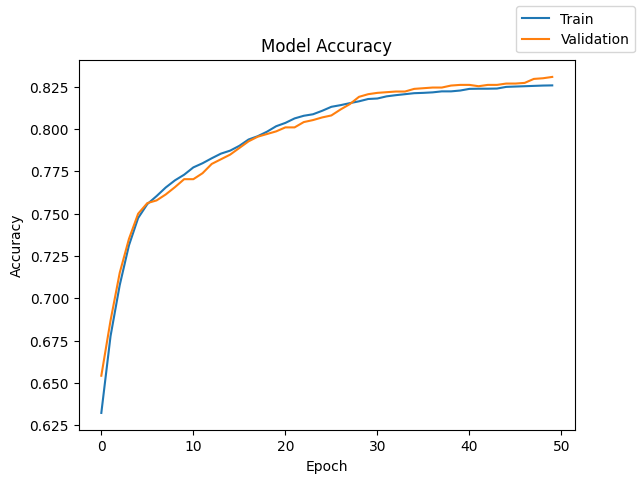

In [158]:
plot(history8,'accuracy')

In [159]:
model8_train_perf = model_performance_classification(model8,X_btrain,y_btrain)
model8_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.828002  0.828002   0.828018     0.828

In [160]:
model8_val_perf = model_performance_classification(model8,X_bval,y_bval)
model8_val_perf

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy    Recall  Precision  F1 Score
0  0.830848  0.830848   0.830938  0.830836

**Observations:**
* Model8 has training recall of 82.8% and validation recall of 83%
* Number of parameters is 281
* Train and validation recall performance are close . Model generalises well.

### Model9: Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [161]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [162]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [163]:
#Initializing the neural network of 14,7,1
model9 = Sequential()

#First Hidden Layer
model9.add(Dense(14,activation="relu",input_dim=X_btrain.shape[1]))

#Second Hidden Layer
model9.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model9.add(Dense(1,activation="sigmoid"))

In [164]:
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [165]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model9.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [166]:
start = time.time()
history9 = model9.fit(X_btrain, y_btrain, epochs=epochs, validation_data=(X_bval,y_bval),batch_size=batch_size,verbose=2)
end=time.time()

Epoch 1/50
160/160 - 4s - 25ms/step - accuracy: 0.6672 - loss: 0.6117 - val_accuracy: 0.7425 - val_loss: 0.5332
Epoch 2/50
160/160 - 3s - 18ms/step - accuracy: 0.7763 - loss: 0.4799 - val_accuracy: 0.7955 - val_loss: 0.4560
Epoch 3/50
160/160 - 1s - 4ms/step - accuracy: 0.8003 - loss: 0.4373 - val_accuracy: 0.8073 - val_loss: 0.4341
Epoch 4/50
160/160 - 0s - 3ms/step - accuracy: 0.8085 - loss: 0.4224 - val_accuracy: 0.8144 - val_loss: 0.4212
Epoch 5/50
160/160 - 0s - 3ms/step - accuracy: 0.8140 - loss: 0.4134 - val_accuracy: 0.8191 - val_loss: 0.4127
Epoch 6/50
160/160 - 1s - 4ms/step - accuracy: 0.8182 - loss: 0.4072 - val_accuracy: 0.8234 - val_loss: 0.4061
Epoch 7/50
160/160 - 1s - 3ms/step - accuracy: 0.8201 - loss: 0.4026 - val_accuracy: 0.8242 - val_loss: 0.4009
Epoch 8/50
160/160 - 1s - 3ms/step - accuracy: 0.8220 - loss: 0.3990 - val_accuracy: 0.8234 - val_loss: 0.3971
Epoch 9/50
160/160 - 1s - 4ms/step - accuracy: 0.8237 - loss: 0.3962 - val_accuracy: 0.8238 - val_loss: 0.3942

In [167]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.624032735824585


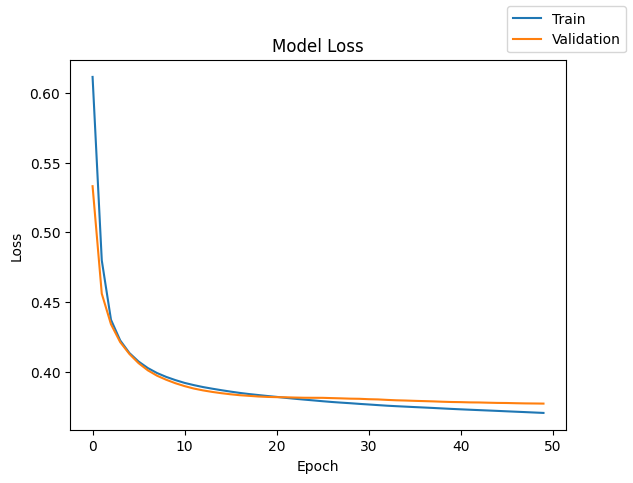

In [168]:
plot(history9,'loss')

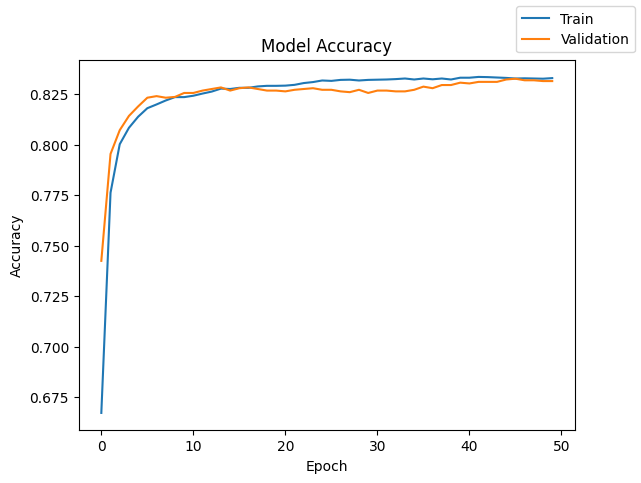

In [169]:
plot(history9,'accuracy')

In [170]:
model9_train_perf = model_performance_classification(model9,X_btrain,y_btrain)
model9_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.834282  0.834282    0.83431  0.834278

In [171]:
model9_val_perf = model_performance_classification(model9,X_bval,y_bval)
model9_val_perf

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.831633  0.831633   0.831782  0.831614

**Observations:**
* Model9 has training recall of 83.4% and validation recall of 83.1%
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data.

### Model10: Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [172]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [173]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [174]:
#Initializing the neural network of 14,7,1
model10 = Sequential()

#First Hidden Layer
model10.add(Dense(14,activation="relu",input_dim=X_btrain.shape[1]))

#Adding Dropout to prevent overfitting
model10.add(Dropout(0.5))
#Second Hidden Layer
model10.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model10.add(Dense(1,activation="sigmoid"))

In [175]:
model10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model10.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [177]:
start = time.time()
history10 = model10.fit(X_btrain, y_btrain, epochs=epochs, validation_data=(X_bval,y_bval),batch_size=batch_size,verbose=2)
end=time.time()

Epoch 1/50
160/160 - 5s - 31ms/step - accuracy: 0.5675 - loss: 0.6762 - val_accuracy: 0.7021 - val_loss: 0.6354
Epoch 2/50
160/160 - 2s - 11ms/step - accuracy: 0.6840 - loss: 0.6130 - val_accuracy: 0.7618 - val_loss: 0.5573
Epoch 3/50
160/160 - 1s - 3ms/step - accuracy: 0.7243 - loss: 0.5669 - val_accuracy: 0.7806 - val_loss: 0.5131
Epoch 4/50
160/160 - 1s - 3ms/step - accuracy: 0.7406 - loss: 0.5375 - val_accuracy: 0.7885 - val_loss: 0.4877
Epoch 5/50
160/160 - 1s - 4ms/step - accuracy: 0.7600 - loss: 0.5193 - val_accuracy: 0.7892 - val_loss: 0.4746
Epoch 6/50
160/160 - 1s - 4ms/step - accuracy: 0.7680 - loss: 0.5071 - val_accuracy: 0.7920 - val_loss: 0.4706
Epoch 7/50
160/160 - 0s - 3ms/step - accuracy: 0.7737 - loss: 0.4958 - val_accuracy: 0.7955 - val_loss: 0.4619
Epoch 8/50
160/160 - 1s - 4ms/step - accuracy: 0.7798 - loss: 0.4877 - val_accuracy: 0.7995 - val_loss: 0.4557
Epoch 9/50
160/160 - 1s - 4ms/step - accuracy: 0.7809 - loss: 0.4790 - val_accuracy: 0.8034 - val_loss: 0.4501

In [178]:
print("Time taken in seconds ",end-start)

Time taken in seconds  36.31879806518555


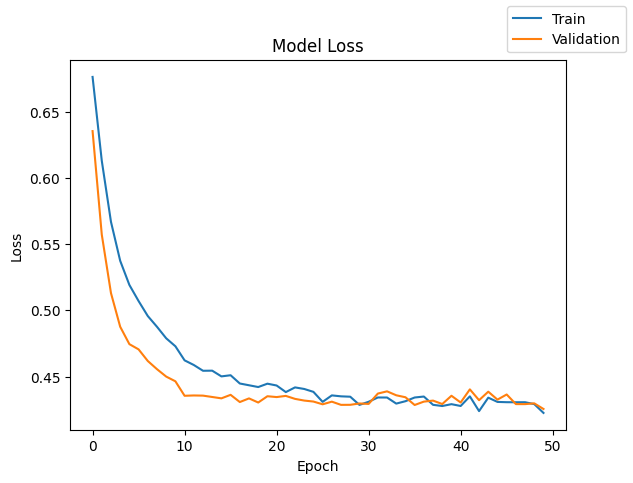

In [179]:
plot(history10,'loss')

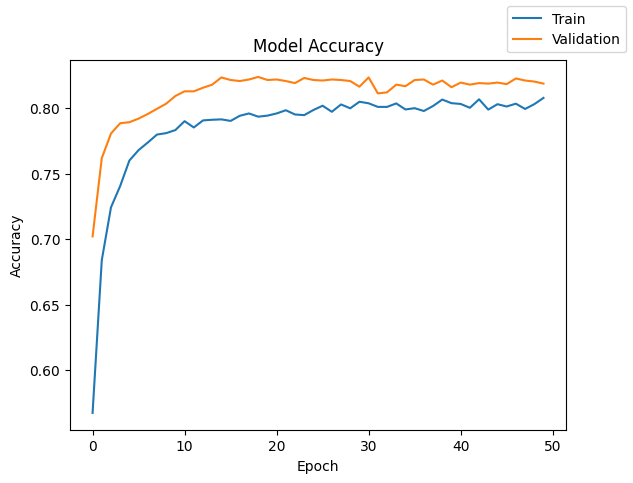

In [180]:
plot(history10,'accuracy')

In [181]:
model10_train_perf = model_performance_classification(model10,X_btrain,y_btrain)
model10_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.818878  0.818878   0.823452  0.818235

In [182]:
model10_val_perf = model_performance_classification(model10,X_bval,y_bval)
model10_val_perf

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.818681  0.818681   0.822922  0.818084

**Observations:**
* Model10 has training recall of 81.9% and validation recall of around 81.9%
* Number of parameters is 281
* Train and validation recall performance are close and model generalises well on unseen data.


## Model Performance Comparison and Final Model Selection

In [183]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model0_train_perf.T,
        model1_train_perf.T,
        model2_train_perf.T,
        model5_train_perf.T,
        model4_train_perf.T,
        model5_train_perf.T,
        model6_train_perf.T,
        model7_train_perf.T,
        model9_train_perf.T,
        model8_train_perf.T,
        model10_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD without class weight,epochs=25)",
    "Neural Network (SGD without class weight with momentum)",
    "Neural Network (SGD without class weight,epochs=50)",
    "Neural Network (SGD without batchsize)",
    "Neural Network (SGD with batchsize)",
    "Neural Network (SGD with batchsize,Different Number of Neurons[32,16,1]",
    "Neural Network (Adam)",
    "Neural Network (Adam, dropout [0.5])",
    "Neural Network (SGD, Balanced Data SMOTE)",
    "Neural Network (Adam, Balanced Data SMOTE)",
    "Neural Network (Adam,Balanced Data SMOTE,dropout [0.5])"
]

In [184]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        model0_val_perf.T,
        model1_val_perf.T,
        model2_val_perf.T,
        model3_val_perf.T,
        model4_val_perf.T,
        model5_val_perf.T,
        model6_val_perf.T,
        model7_val_perf.T,
        model8_val_perf.T,
        model9_val_perf.T,
        model10_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Neural Network (SGD without class weight,epochs=25)",
    "Neural Network (SGD without class weight with momentum)",
    "Neural Network (SGD without class weight,epochs=50)",
    "Neural Network (SGD without batchsize)",
    "Neural Network (SGD with batchsize)",
    "Neural Network (SGD with batchsize,Different Number of Neurons[32,16,1]",
    "Neural Network (Adam)",
    "Neural Network (Adam, dropout [0.5])",
    "Neural Network (SGD, Balanced Data SMOTE)",
    "Neural Network (Adam, Balanced Data SMOTE)",
    "Neural Network (Adam,Balanced Data SMOTE,dropout [0.5])"
]

In [185]:
models_train_comp_df

Neural Network (SGD without class weight,epochs=25)  \
Accuracy                                            0.833281     
Recall                                              0.833281     
Precision                                           0.821079     
F1 Score                                            0.801198     

           Neural Network (SGD without class weight with momentum)  \
Accuracy                                            0.862031         
Recall                                              0.862031         
Precision                                           0.852781         
F1 Score                                            0.849874         

           Neural Network (SGD without class weight,epochs=50)  \
Accuracy                                            0.841406     
Recall                                              0.841406     
Precision                                           0.827612     
F1 Score                                            0.820257     

           Neural Network (SGD without batchsize)  \
Accuracy                                 0.790937   
Recall                                   0.790937   
Precision                                0.843698   
F1 Score                                 0.806151   

           Neural Network (SGD with batchsize)  \
Accuracy                              0.777500   
Recall                                0.777500   
Precision                             0.837294   
F1 Score                              0.794541   

           Neural Network (SGD with batchsize,Different Number of Neurons[32,16,1]  \
Accuracy                                            0.790937                         
Recall                                              0.790937                         
Precision                                           0.843698                         
F1 Score                                            0.806151                         

           Neural Network (Adam)  Neural Network (Adam, dropout [0.5])  \
Accuracy                0.864219                              0.857969   
Recall                  0.864219                              0.857969   
Precision               0.855599                              0.848112   
F1 Score                0.851926                              0.843839   

           Neural Network (SGD, Balanced Data SMOTE)  \
Accuracy                                    0.834282   
Recall                                      0.834282   
Precision                                   0.834310   
F1 Score                                    0.834278   

           Neural Network (Adam, Balanced Data SMOTE)  \
Accuracy                                     0.828002   
Recall                                       0.828002   
Precision                                    0.828018   
F1 Score                                     0.828000   

           Neural Network (Adam,Balanced Data SMOTE,dropout [0.5])  
Accuracy                                            0.818878        
Recall                                              0.818878        
Precision                                           0.823452        
F1 Score                                            0.818235

In [186]:
models_val_comp_df

Neural Network (SGD without class weight,epochs=25)  \
Accuracy                                            0.825000     
Recall                                              0.825000     
Precision                                           0.806742     
F1 Score                                            0.790613     

           Neural Network (SGD without class weight with momentum)  \
Accuracy                                            0.857500         
Recall                                              0.857500         
Precision                                           0.847249         
F1 Score                                            0.844355         

           Neural Network (SGD without class weight,epochs=50)  \
Accuracy                                            0.836250     
Recall                                              0.836250     
Precision                                           0.820166     
F1 Score                                            0.814844     

           Neural Network (SGD without batchsize)  \
Accuracy                                 0.773750   
Recall                                   0.773750   
Precision                                0.833078   
F1 Score                                 0.790960   

           Neural Network (SGD with batchsize)  \
Accuracy                              0.756875   
Recall                                0.756875   
Precision                             0.826982   
F1 Score                              0.776645   

           Neural Network (SGD with batchsize,Different Number of Neurons[32,16,1]  \
Accuracy                                            0.777500                         
Recall                                              0.777500                         
Precision                                           0.833179                         
F1 Score                                            0.793943                         

           Neural Network (Adam)  Neural Network (Adam, dropout [0.5])  \
Accuracy                0.859375                              0.858750   
Recall                  0.859375                              0.858750   
Precision               0.849714                              0.849153   
F1 Score                0.845986                              0.844590   

           Neural Network (SGD, Balanced Data SMOTE)  \
Accuracy                                    0.830848   
Recall                                      0.830848   
Precision                                   0.830938   
F1 Score                                    0.830836   

           Neural Network (Adam, Balanced Data SMOTE)  \
Accuracy                                     0.831633   
Recall                                       0.831633   
Precision                                    0.831782   
F1 Score                                     0.831614   

           Neural Network (Adam,Balanced Data SMOTE,dropout [0.5])  
Accuracy                                            0.818681        
Recall                                              0.818681        
Precision                                           0.822922        
F1 Score                                            0.818084

In [187]:
# Difference of training performance and Validation Performance for each model
models_train_comp_df.loc["Recall"] - models_val_comp_df.loc["Recall"]

Neural Network (SGD without class weight,epochs=25)                        0.008281
Neural Network (SGD without class weight with momentum)                    0.004531
Neural Network (SGD without class weight,epochs=50)                        0.005156
Neural Network (SGD without batchsize)                                     0.017187
Neural Network (SGD with batchsize)                                        0.020625
Neural Network (SGD with batchsize,Different Number of Neurons[32,16,1]    0.013437
Neural Network (Adam)                                                      0.004844
Neural Network (Adam, dropout [0.5])                                      -0.000781
Neural Network (SGD, Balanced Data SMOTE)                                  0.003434
Neural Network (Adam, Balanced Data SMOTE)                                -0.003630
Neural Network (Adam,Balanced Data SMOTE,dropout [0.5])                    0.000196
Name: Recall, dtype: float64

- Final Model: **Neural Network (Adam)**
- Reasoning:
  - Best Recall score on the training set (~86.4%), indicating strong performance in learning from the training data.
  - Best Recall score on the validation set (~85.9%), demonstrating good performance in generalizing to unseen data.
  - When considering validation scores only, Model 6 - Neural Network with Adam Optimizer outperforms others, suggesting its effectiveness in real-world applications and new data scenarios.

- We'll go ahead with this model as our final model.

- Let's rebuild it and check its performance across multiple metrics

### Final Model

In [188]:
# defining the batch size and # epochs
epochs = 50
batch_size = 64

In [189]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [190]:
#Initializing the neural network of 14,7,1
model = Sequential()

#First Hidden Layer
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))

#Second Hidden Layer
model.add(Dense(7,activation="relu"))

#output layer :Sigmoid is used for binary classification
#we have an output of 1 node, which is the the desired dimensions of our output whether the customer will exit or not
model.add(Dense(1,activation="sigmoid"))

In [191]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [193]:
start = time.time()
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val),batch_size=batch_size,verbose=2)
end=time.time()

Epoch 1/50
100/100 - 2s - 23ms/step - accuracy: 0.7844 - loss: 0.5472 - val_accuracy: 0.7962 - val_loss: 0.4842
Epoch 2/50
100/100 - 2s - 16ms/step - accuracy: 0.7966 - loss: 0.4637 - val_accuracy: 0.7962 - val_loss: 0.4524
Epoch 3/50
100/100 - 0s - 3ms/step - accuracy: 0.7975 - loss: 0.4375 - val_accuracy: 0.7950 - val_loss: 0.4337
Epoch 4/50
100/100 - 0s - 3ms/step - accuracy: 0.8012 - loss: 0.4192 - val_accuracy: 0.8050 - val_loss: 0.4199
Epoch 5/50
100/100 - 0s - 3ms/step - accuracy: 0.8195 - loss: 0.4047 - val_accuracy: 0.8206 - val_loss: 0.4088
Epoch 6/50
100/100 - 1s - 6ms/step - accuracy: 0.8306 - loss: 0.3932 - val_accuracy: 0.8300 - val_loss: 0.3991
Epoch 7/50
100/100 - 1s - 6ms/step - accuracy: 0.8361 - loss: 0.3836 - val_accuracy: 0.8281 - val_loss: 0.3910
Epoch 8/50
100/100 - 0s - 3ms/step - accuracy: 0.8384 - loss: 0.3758 - val_accuracy: 0.8338 - val_loss: 0.3845
Epoch 9/50
100/100 - 1s - 7ms/step - accuracy: 0.8414 - loss: 0.3696 - val_accuracy: 0.8394 - val_loss: 0.3796

In [194]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.94053626060486


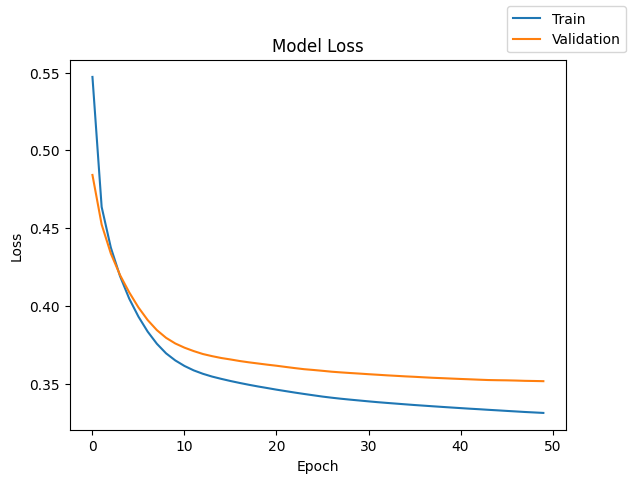

In [195]:
plot(history,'loss')

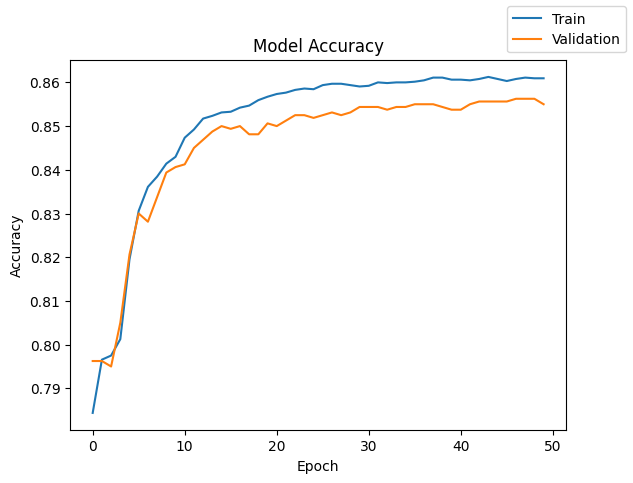

In [196]:
plot(history,'accuracy')

In [197]:
model_train_perf = model_performance_classification(model,X_train,y_train)
model_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.862344  0.862344   0.853659  0.848788

In [198]:
model_val_perf = model_performance_classification(model,X_val,y_val)
model_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0     0.855   0.855   0.845015  0.838641

In [199]:
model_test_perf = model_performance_classification(model,X_test,y_test)
model_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8615  0.8615   0.853022  0.846844

In [200]:
y_train_pred = model.predict(X_train)

# Predicting on val
y_val_pred = model.predict(X_val)

# Predicting on test
y_test_pred=model.predict(X_test)


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [201]:
print("Classification Report - Training data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Training data

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5096
           1       0.77      0.47      0.58      1304

    accuracy                           0.86      6400
   macro avg       0.82      0.71      0.75      6400
weighted avg       0.85      0.86      0.85      6400



In [202]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1274
           1       0.76      0.43      0.55       326

    accuracy                           0.85      1600
   macro avg       0.81      0.70      0.73      1600
weighted avg       0.85      0.85      0.84      1600



In [203]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [204]:
score = model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8708 - loss: 0.3128


In [205]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.3386223614215851
Test Accuracy: 0.8615000247955322


- The weighted recall score on the test data is ~0.86

- A recall score of ~0.86 indicates that model is classifying instancess with minimal false negatives

- Model can be further tuned to deal with minority class.


## Actionable Insights and Business Recommendations


- The Bank can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether a customer is likely to leave the bank or will remain cutomer, and this process seems to be easier and more time-efficient than other methods.

- Bank to provide better services or promotions to retain female customers as it shows that female Bank customers are more likely to churn than male customers.

- Business leader to come up with strategies how the bank can win more customers in Spain and Germany.

- Bank to come up with promotions,strategies to retain customers in Germany as there are more customers exiting in Germany than in Spain or France.






<font size=6 color='blue'>Power Ahead</font>
___